# Predictive Modelling for Song Popularity on the Billboard Hot 100 Using Spotify Data

# 

## Data Gathering and Data Preprocessing

# 

In [1]:
# Silencing all warnings

import warnings
warnings.filterwarnings('ignore')

# 

### Importing all necessary libraries for the project

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

# 

### Loading the csv dataset into a dataframe from the Billboard Hot 100

In [3]:
data = pd.read_csv("Hot100.csv")

# 

### Showing the top 5 rows in the data

In [4]:
print(data.shape)
data.head(5)

(338395, 13)


,chart_position,chart_date,song,performer,song_id,instance,time_on_chart,consecutive_weeks,previous_week,peak_position,worst_position,chart_debut,chart_url
0,84,1990-05-05,"""B"" Girls",Young And Restless,"""B"" GirlsYoung And Restless",1.0,1,NaN,NaN,84,84,1990-05-05,https://www.billboard.com/charts/hot-100/1990-...
1,78,1990-05-12,"""B"" Girls",Young And Restless,"""B"" GirlsYoung And Restless",1.0,2,1.0,84.0,78,84,1990-05-05,https://www.billboard.com/charts/hot-100/1990-...
2,68,1990-05-19,"""B"" Girls",Young And Restless,"""B"" GirlsYoung And Restless",1.0,3,2.0,78.0,68,84,1990-05-05,https://www.billboard.com/charts/hot-100/1990-...
3,60,1990-05-26,"""B"" Girls",Young And Restless,"""B"" GirlsYoung And Restless",1.0,4,3.0,68.0,60,84,1990-05-05,https://www.billboard.com/charts/hot-100/1990-...
4,58,1990-06-02,"""B"" Girls",Young And Restless,"""B"" GirlsYoung And Restless",1.0,5,4.0,60.0,58,84,1990-05-05,https://www.billboard.com/charts/hot-100/1990-...


### Comments
#### The data has 338,395 rows and 13 columns
#### Some cells in the dataframe have empty cells

# 

### Describing the data

In [5]:
data.describe()

,chart_position,instance,time_on_chart,consecutive_weeks,previous_week,peak_position,worst_position
count,338395.000000,338395.000000,338395.000000,304728.000000,304728.000000,338395.000000,338395.000000
mean,50.499331,1.085512,9.251428,8.794673,47.559332,40.773909,80.636939
std,28.865719,0.404260,7.780156,7.376849,28.045474,29.340876,18.246476
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,25.500000,1.000000,4.000000,3.000000,23.000000,13.000000,74.000000
50%,50.000000,1.000000,7.000000,7.000000,47.000000,38.000000,86.000000
75%,75.000000,1.000000,13.000000,12.000000,71.000000,65.000000,94.000000
max,100.000000,15.000000,91.000000,89.000000,100.000000,100.000000,100.000000


# 

### Dropping the song_id, chart_debut and chart_url columns and assigning the new data to data1

In [6]:
data1 = data.drop(columns=['song_id', 'chart_debut', 'chart_url']) # The song_id, chart_debut, and chart_url columns were removed because they are not relevant in the data
print(data1.shape)
data1.head(5)

(338395, 10)


,chart_position,chart_date,song,performer,instance,time_on_chart,consecutive_weeks,previous_week,peak_position,worst_position
0,84,1990-05-05,"""B"" Girls",Young And Restless,1.0,1,NaN,NaN,84,84
1,78,1990-05-12,"""B"" Girls",Young And Restless,1.0,2,1.0,84.0,78,84
2,68,1990-05-19,"""B"" Girls",Young And Restless,1.0,3,2.0,78.0,68,84
3,60,1990-05-26,"""B"" Girls",Young And Restless,1.0,4,3.0,68.0,60,84
4,58,1990-06-02,"""B"" Girls",Young And Restless,1.0,5,4.0,60.0,58,84


# 

### Replacing the fields with empty data with zero and assigning the new data to data2

In [7]:
data2 = data1.replace(np.nan,0,regex = True) # Replacing the nan values with zero
print(data2.shape)
data2.head(5)

(338395, 10)


,chart_position,chart_date,song,performer,instance,time_on_chart,consecutive_weeks,previous_week,peak_position,worst_position
0,84,1990-05-05,"""B"" Girls",Young And Restless,1.0,1,0.0,0.0,84,84
1,78,1990-05-12,"""B"" Girls",Young And Restless,1.0,2,1.0,84.0,78,84
2,68,1990-05-19,"""B"" Girls",Young And Restless,1.0,3,2.0,78.0,68,84
3,60,1990-05-26,"""B"" Girls",Young And Restless,1.0,4,3.0,68.0,60,84
4,58,1990-06-02,"""B"" Girls",Young And Restless,1.0,5,4.0,60.0,58,84


# 

### Describing the new data; data2

In [8]:
data2.describe()

,chart_position,instance,time_on_chart,consecutive_weeks,previous_week,peak_position,worst_position
count,338395.000000,338395.000000,338395.000000,338395.000000,338395.000000,338395.000000,338395.000000
mean,50.499331,1.085512,9.251428,7.919689,42.827642,40.773909,80.636939
std,28.865719,0.404260,7.780156,7.478867,30.181819,29.340876,18.246476
min,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
25%,25.500000,1.000000,4.000000,2.000000,16.000000,13.000000,74.000000
50%,50.000000,1.000000,7.000000,6.000000,41.000000,38.000000,86.000000
75%,75.000000,1.000000,13.000000,12.000000,69.000000,65.000000,94.000000
max,100.000000,15.000000,91.000000,89.000000,100.000000,100.000000,100.000000


# 

### Checking the correlation between the columns in data2

In [9]:
data2.corr()

,chart_position,instance,time_on_chart,consecutive_weeks,previous_week,peak_position,worst_position
chart_position,1.000000,0.029200,-0.328297,-0.338449,0.593515,0.820081,0.473168
instance,0.029200,1.000000,0.188400,0.003455,0.008511,-0.001633,0.134564
time_on_chart,-0.328297,0.188400,1.000000,0.958067,-0.152074,-0.600633,-0.048325
consecutive_weeks,-0.338449,0.003455,0.958067,1.000000,-0.150923,-0.608339,-0.069594
previous_week,0.593515,0.008511,-0.152074,-0.150923,1.000000,0.472281,0.392193
peak_position,0.820081,-0.001633,-0.600633,-0.608339,0.472281,1.000000,0.449277
worst_position,0.473168,0.134564,-0.048325,-0.069594,0.392193,0.449277,1.000000


### Comments
#### Peak position has a strong positive correlation with chart_position
#### Instance has a weak positive correlation with chart_position
#### The rest of the columns have a fair positive/negative correlation with chart_position

# 

### Visualizing the correlation between the columns in data2

<AxesSubplot:>

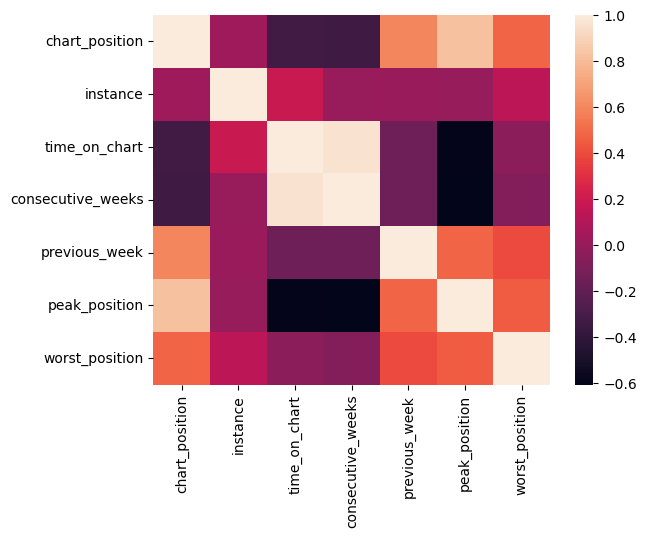

In [10]:
sns.heatmap(data2.corr())

# 

### Splitting the chart_date column into day, month and year, adding them to data2 and converting them to numeric columns

In [11]:
date = data2["chart_date"].str.split("-", n = 2, expand = True)
year = date[0].tolist()
data2["year"] = year
month = date[1].tolist()
data2["month"] = month
day = date[2].tolist()
data2["day"] = day

data2[['year', 'month', 'day']] = data2[['year', 'month', 'day']].apply(pd.to_numeric)

# 

### Describing the new data2

In [12]:
data2.describe()

,chart_position,instance,time_on_chart,consecutive_weeks,previous_week,peak_position,worst_position,year,month,day
count,338395.000000,338395.000000,338395.000000,338395.000000,338395.000000,338395.000000,338395.000000,338395.000000,338395.000000,338395.000000
mean,50.499331,1.085512,9.251428,7.919689,42.827642,40.773909,80.636939,1990.502357,6.521796,15.730758
std,28.865719,0.404260,7.780156,7.478867,30.181819,29.340876,18.246476,18.726199,3.454016,8.798994
min,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1958.000000,1.000000,1.000000
25%,25.500000,1.000000,4.000000,2.000000,16.000000,13.000000,74.000000,1974.000000,4.000000,8.000000
50%,50.000000,1.000000,7.000000,6.000000,41.000000,38.000000,86.000000,1990.000000,7.000000,16.000000
75%,75.000000,1.000000,13.000000,12.000000,69.000000,65.000000,94.000000,2007.000000,10.000000,23.000000
max,100.000000,15.000000,91.000000,89.000000,100.000000,100.000000,100.000000,2023.000000,12.000000,31.000000


# 

### Displaying data showing from the year 2010 and assigning them to data3

In [13]:
data3 = data2[data2['year'] > 2009]
print(data3.shape)
data3.head()

(70100, 13)


,chart_position,chart_date,song,performer,instance,time_on_chart,consecutive_weeks,previous_week,peak_position,worst_position,year,month,day
96,24,2013-05-25,#Beautiful,Mariah Carey Featuring Miguel,1.0,1,0.0,0.0,24,24,2013,5,25
97,20,2013-06-01,#Beautiful,Mariah Carey Featuring Miguel,1.0,2,1.0,24.0,20,24,2013,6,1
98,20,2013-06-08,#Beautiful,Mariah Carey Featuring Miguel,1.0,3,2.0,20.0,20,24,2013,6,8
99,17,2013-06-15,#Beautiful,Mariah Carey Featuring Miguel,1.0,4,3.0,20.0,17,24,2013,6,15
100,15,2013-06-22,#Beautiful,Mariah Carey Featuring Miguel,1.0,5,4.0,17.0,15,24,2013,6,22


### Comments
#### Some song names have "#" attached to them

# 

### Removing the "#" attached to the song names

In [14]:
data3['song'] = data3['song'].str.replace('#', '')
print(data3.shape)
data3.head()

(70100, 13)


,chart_position,chart_date,song,performer,instance,time_on_chart,consecutive_weeks,previous_week,peak_position,worst_position,year,month,day
96,24,2013-05-25,Beautiful,Mariah Carey Featuring Miguel,1.0,1,0.0,0.0,24,24,2013,5,25
97,20,2013-06-01,Beautiful,Mariah Carey Featuring Miguel,1.0,2,1.0,24.0,20,24,2013,6,1
98,20,2013-06-08,Beautiful,Mariah Carey Featuring Miguel,1.0,3,2.0,20.0,20,24,2013,6,8
99,17,2013-06-15,Beautiful,Mariah Carey Featuring Miguel,1.0,4,3.0,20.0,17,24,2013,6,15
100,15,2013-06-22,Beautiful,Mariah Carey Featuring Miguel,1.0,5,4.0,17.0,15,24,2013,6,22


# 

### Showing the correlation between the columns in data3

In [15]:
data3.corr()

,chart_position,instance,time_on_chart,consecutive_weeks,previous_week,peak_position,worst_position,year,month,day
chart_position,1.000000e+00,0.018174,-0.418942,-0.419996,0.603383,0.818705,0.527988,1.592984e-14,-1.238207e-16,-4.024624e-17
instance,1.817380e-02,1.000000,0.171725,-0.064656,0.016888,0.008013,0.220724,8.595038e-02,-3.189131e-02,-1.081308e-02
time_on_chart,-4.189416e-01,0.171725,1.000000,0.924481,-0.152477,-0.558901,0.006453,7.146851e-03,-1.951204e-02,-4.060597e-03
consecutive_weeks,-4.199958e-01,-0.064656,0.924481,1.000000,-0.138118,-0.550976,-0.028495,-5.601862e-02,1.067657e-02,-4.875117e-04
previous_week,6.033831e-01,0.016888,-0.152477,-0.138118,1.000000,0.452403,0.460765,-4.931974e-02,-7.291455e-03,4.264323e-03
peak_position,8.187054e-01,0.008013,-0.558901,-0.550976,0.452403,1.000000,0.510129,-6.379458e-02,-1.176273e-02,2.833280e-03
worst_position,5.279882e-01,0.220724,0.006453,-0.028495,0.460765,0.510129,1.000000,-1.522654e-01,-2.650886e-02,-1.033393e-03
year,1.592984e-14,0.085950,0.007147,-0.056019,-0.049320,-0.063795,-0.152265,1.000000e+00,-5.657874e-02,-4.918881e-03
month,-1.238207e-16,-0.031891,-0.019512,0.010677,-0.007291,-0.011763,-0.026509,-5.657874e-02,1.000000e+00,1.124568e-02
day,-4.024624e-17,-0.010813,-0.004061,-0.000488,0.004264,0.002833,-0.001033,-4.918881e-03,1.124568e-02,1.000000e+00


### Comments
#### The newly added year, month and day columns have weak correlations with chart_position

# 

### Visualizing the correlation between the columns in data3

<AxesSubplot:>

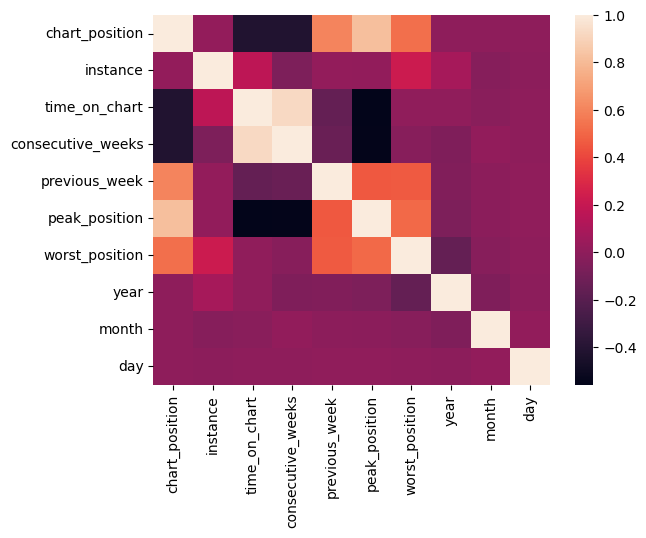

In [16]:
sns.heatmap(data3.corr())

# 

### Limiting the Billboard data to only 2019 and 2020

In [17]:
data4 = data3[(data3['year'] == 2019) | (data3['year'] == 2020)] # Selecting all rows where year is 2019 or 2020
print(data4.shape)
data4.head()

(10400, 13)


,chart_position,chart_date,song,performer,instance,time_on_chart,consecutive_weeks,previous_week,peak_position,worst_position,year,month,day
320,39,2020-12-26,'Tis The Damn Season,Taylor Swift,1.0,1,0.0,0.0,39,39,2020,12,26
2029,32,2019-01-05,(There's No Place Like) Home For The Holidays,Perry Como,1.0,2,1.0,41.0,32,41,2019,1,5
2030,37,2020-01-04,(There's No Place Like) Home For The Holidays,Perry Como,2.0,3,0.0,0.0,32,41,2020,1,4
2031,47,2020-12-12,(There's No Place Like) Home For The Holidays,Perry Como,3.0,4,0.0,0.0,32,47,2020,12,12
2032,37,2020-12-19,(There's No Place Like) Home For The Holidays,Perry Como,3.0,5,1.0,47.0,32,47,2020,12,19


# 

### Showing only songs that have made it to the top 10

In [18]:
data5 = data4[(data4['chart_position'] < 11)] # Selecting all rows where chart position is less than 11
print(data5.shape)
data5.head()

(1040, 13)


,chart_position,chart_date,song,performer,instance,time_on_chart,consecutive_weeks,previous_week,peak_position,worst_position,year,month,day
2961,4,2019-10-19,"10,000 Hours",Dan + Shay & Justin Bieber,1.0,1,0.0,0.0,4,4,2019,10,19
2963,10,2019-11-02,"10,000 Hours",Dan + Shay & Justin Bieber,1.0,3,2.0,11.0,4,11,2019,11,2
2965,10,2019-11-16,"10,000 Hours",Dan + Shay & Justin Bieber,1.0,5,4.0,12.0,4,12,2019,11,16
2966,10,2019-11-23,"10,000 Hours",Dan + Shay & Justin Bieber,1.0,6,5.0,10.0,4,12,2019,11,23
2967,9,2019-11-30,"10,000 Hours",Dan + Shay & Justin Bieber,1.0,7,6.0,10.0,4,12,2019,11,30


# 

### Showing the correlation between the columns in data5(songs that appeared in the top 10)

In [19]:
data5.corr()

,chart_position,instance,time_on_chart,consecutive_weeks,previous_week,peak_position,worst_position,year,month,day
chart_position,1.000000e+00,-0.047962,0.120123,0.141400,0.374614,0.563563,0.069833,3.369739e-14,9.564983e-18,3.935273e-17
instance,-4.796249e-02,1.000000,0.243913,-0.170326,0.099480,0.042287,0.276459,4.317320e-02,1.299352e-01,9.520373e-03
time_on_chart,1.201235e-01,0.243913,1.000000,0.904600,0.032868,-0.249523,0.475218,6.064245e-02,4.848740e-02,-3.103893e-03
consecutive_weeks,1.414004e-01,-0.170326,0.904600,1.000000,-0.004010,-0.265575,0.368178,3.938289e-02,-2.114045e-02,-1.210770e-02
previous_week,3.746142e-01,0.099480,0.032868,-0.004010,1.000000,0.315086,0.202694,-7.791855e-03,2.097030e-02,8.449296e-03
peak_position,5.635633e-01,0.042287,-0.249523,-0.265575,0.315086,1.000000,0.143075,4.285574e-02,1.229418e-02,-1.191357e-03
worst_position,6.983338e-02,0.276459,0.475218,0.368178,0.202694,0.143075,1.000000,1.427136e-01,4.646578e-02,-1.385374e-02
year,3.369739e-14,0.043173,0.060642,0.039383,-0.007792,0.042856,0.142714,1.000000e+00,-8.436057e-03,-5.485468e-03
month,9.564983e-18,0.129935,0.048487,-0.021140,0.020970,0.012294,0.046466,-8.436057e-03,1.000000e+00,6.311083e-02
day,3.935273e-17,0.009520,-0.003104,-0.012108,0.008449,-0.001191,-0.013854,-5.485468e-03,6.311083e-02,1.000000e+00


### Comments
#### The peak position has a high positive correlation with chart position
#### The consecutive weaks has a fair positive correlation with chart position

# 

### Visualizing the correlation between the columns in data5(songs that appeared in the top 10)

<AxesSubplot:>

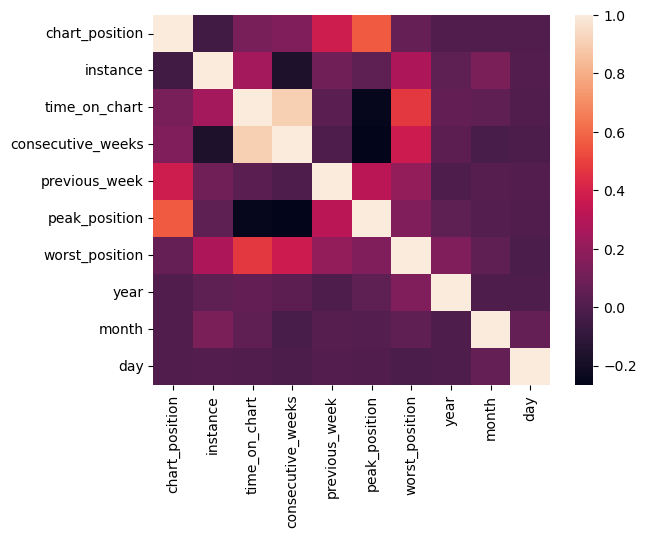

In [20]:
sns.heatmap(data5.corr())

# 

### Showing songs that have stayed longer on the chart

In [21]:
data6 = data5[(data5['time_on_chart'] > data5['time_on_chart'].max()-10)] # Selecting all rows with higher time on chart
print(data6.shape)
data6.head()

(18, 13)


,chart_position,chart_date,song,performer,instance,time_on_chart,consecutive_weeks,previous_week,peak_position,worst_position,year,month,day
33133,6,2020-10-17,Blinding Lights,The Weeknd,1.0,45,44.0,6.0,1,72,2020,10,17
33134,4,2020-10-24,Blinding Lights,The Weeknd,1.0,46,45.0,6.0,1,72,2020,10,24
33135,4,2020-10-31,Blinding Lights,The Weeknd,1.0,47,46.0,4.0,1,72,2020,10,31
33136,5,2020-11-07,Blinding Lights,The Weeknd,1.0,48,47.0,4.0,1,72,2020,11,7
33137,4,2020-11-14,Blinding Lights,The Weeknd,1.0,49,48.0,5.0,1,72,2020,11,14


# 

### Showing the correlation between the columns in data6(songs that appeared in the top 10 for longer)

In [22]:
data6.corr()

,chart_position,instance,time_on_chart,consecutive_weeks,previous_week,peak_position,worst_position,year,month,day
chart_position,1.000000,0.189331,0.178496,-0.141343,0.605318,-0.299265,-0.215876,-0.436250,-0.451591,-0.175165
instance,0.189331,1.000000,-0.093974,-0.975525,-0.409066,0.058824,0.050982,-0.685994,0.177859,0.087175
time_on_chart,0.178496,-0.093974,1.000000,0.310591,-0.009694,-0.323935,-0.031038,0.136990,0.439128,-0.216370
consecutive_weeks,-0.141343,-0.975525,0.310591,1.000000,0.388423,-0.127709,-0.055532,0.685223,-0.072826,-0.131021
previous_week,0.605318,-0.409066,-0.009694,0.388423,1.000000,-0.320850,-0.270360,-0.057038,-0.693227,0.064809
peak_position,-0.299265,0.058824,-0.323935,-0.127709,-0.320850,1.000000,0.132554,0.068599,0.307212,-0.167171
worst_position,-0.215876,0.050982,-0.031038,-0.055532,-0.270360,0.132554,1.000000,0.652714,-0.185225,-0.068018
year,-0.436250,-0.685994,0.136990,0.685223,-0.057038,0.068599,0.652714,1.000000,-0.047140,-0.127078
month,-0.451591,0.177859,0.439128,-0.072826,-0.693227,0.307212,-0.185225,-0.047140,1.000000,-0.226935
day,-0.175165,0.087175,-0.216370,-0.131021,0.064809,-0.167171,-0.068018,-0.127078,-0.226935,1.000000


### Comments
#### The previous week has a strong positive correlation with chart position
#### Unlike with data5, the peak position has a fair negative correlation with chart position

# 

### Visualizing the correlation between the columns in data6(songs that appeared in the top 10 for longer)

<AxesSubplot:>

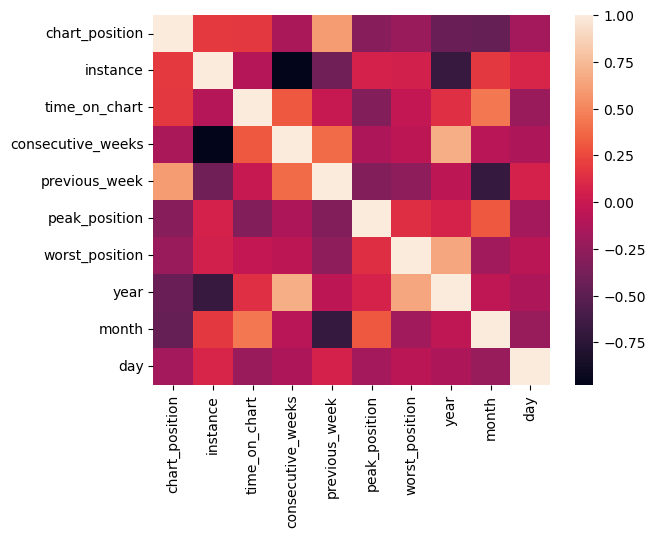

In [23]:
sns.heatmap(data6.corr())

# 

### Showing the Billboard top 5 songs

In [24]:
unique_songs = data6['song'].unique() # List all unique songs
billboard_top5songs = unique_songs.tolist() # Convert them into a list
billboard_top5songs


['Blinding Lights',
 'I Hope',
 'Lucid Dreams',
 'Someone You Loved',
 'Sunflower (Spider-Man: Into The Spider-Verse)']

# 

### Showing the Billboard top 5 performers

In [25]:
unique_performers = data6['performer'].unique() # List all unique performers
billboard_top5performers = unique_performers.tolist() # Convert them into a list
billboard_top5performers


['The Weeknd',
 'Gabby Barrett Featuring Charlie Puth',
 'Juice WRLD',
 'Lewis Capaldi',
 'Post Malone & Swae Lee']

# 

### Spotify web API using Spotipy

### Authentication using the client ID and client secret generated from Spotify

In [26]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
cid = 'put id'
secret = 'put secret'
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

# 

### Fetching data from the Spotify web API from 2019 to 2020

In [28]:
#Initializing a list for each of the tracks and its audio features
artist_name = []
track_name = []
popularity = []
track_id = []
danceability = []
energy = []
key = []
loudness = []
mode = []
speechiness = []
acousticness = []
instrumentalness = []
liveness = []
valence = []
tempo = []
duration_ms = []

for y in range(2018,2020,1):
    for i in range(0,1000,50):
        track_results = sp.search(q='year:'+str(y), type='track', limit=50, offset=i) # A search for tracks between the year 2019 and 2020
        
        for i, t in enumerate(track_results['tracks']['items']): # Looping through the tracks to extract its features
            artist_name.append(t['artists'][0]['name'])
            track_name.append(t['name'])
            track_id.append(t['id'])
            popularity.append(t['popularity'])
            features = sp.audio_features(t['id'])[0] #Fetching audio features of the song using the track id in order to get the other features
            danceability.append(features['danceability'])
            energy.append(features['energy'])
            key.append(features['key'])
            loudness.append(features['loudness'])
            mode.append(features['mode'])
            speechiness.append(features['speechiness'])
            acousticness.append(features['acousticness'])
            instrumentalness.append(features['instrumentalness'])
            liveness.append(features['liveness'])
            valence.append(features['valence'])
            tempo.append(features['tempo'])
            duration_ms.append(features['duration_ms'])

# 

### Creating a track_df dataframe from the data fetched from Spotify

In [29]:
# Creating a dataframe to list the Spotify songs and their features
track_df = pd.DataFrame({'artist_name' : artist_name, 'track_name' : track_name, 'track_id' : track_id,
                                'popularity' : popularity, 'danceability' : danceability, 'energy' : energy,
                                'key' : key, 'loudness' : loudness, 'mode' : mode, 'speechiness' : speechiness,
                                'acousticness' : acousticness, 'instrumentalness' : instrumentalness, 'liveness' : liveness,
                                'valence' : valence, 'tempo' : tempo, 'duration_ms' : duration_ms})
print(track_df.shape)
track_df

(2000, 16)


,artist_name,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,Morgan Wallen,Whiskey Glasses,6foY66mWZN0pSRjZ408c00,85,0.614,0.680,6,-4.580,1,0.0289,0.3690,0.000002,0.1150,0.7070,149.959,234347
1,Morgan Wallen,Chasin' You,5MwynWK9s4hlyKHqhkNn4A,85,0.631,0.591,7,-5.785,1,0.0277,0.6570,0.000000,0.1100,0.4890,97.074,205453
2,Luke Combs,Beautiful Crazy,2rxQMGVafnNaRaXlRMWPde,84,0.551,0.402,11,-7.431,1,0.0262,0.6760,0.000000,0.0928,0.3820,103.313,193200
3,Lil Baby,Drip Too Hard (Lil Baby & Gunna),78QR3Wp35dqAhFEc2qAGjE,86,0.897,0.662,1,-6.903,0,0.2920,0.0852,0.000000,0.5340,0.3890,112.511,145543
4,Luke Combs,She Got the Best of Me,698eQRku24PIYPQPHItKlA,83,0.533,0.907,11,-3.793,1,0.0406,0.0292,0.000000,0.3860,0.7000,150.990,183160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Upchurch,"Hey Boy, Hey Girl",47f6eZgviwSZciXGv2iWYg,61,0.661,0.516,8,-11.207,1,0.0425,0.0013,0.000000,0.0998,0.3330,140.077,200786
1996,Gracie Abrams,Stay,0Uon5NsSAkBDx69XYOaQ5P,71,0.618,0.370,10,-10.500,1,0.0543,0.8830,0.000000,0.1230,0.4330,114.260,177153
1997,The Lumineers,Salt And The Sea,5EKqsMU2tn1iAYNQF8h0ll,61,0.630,0.310,9,-9.253,1,0.0280,0.7040,0.001100,0.1280,0.0712,93.067,270893
1998,KAROL G,Pineapple,24SkzbH7hGhUvqIaKlJ1TY,70,0.778,0.664,4,-4.627,0,0.0830,0.0399,0.000002,0.3100,0.6570,94.951,180960


# 

### Showing the correlation between the columns in track_df

In [30]:
track_df.corr()

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
popularity,1.000000,-0.010993,-0.016084,0.037779,0.041982,-0.056172,-0.089439,0.063877,-0.015792,0.015416,-0.041222,-0.043818,0.037223
danceability,-0.010993,1.000000,0.063715,-0.002212,0.214392,-0.108883,0.316898,-0.197744,-0.210908,-0.052477,0.317770,-0.048910,-0.188952
energy,-0.016084,0.063715,1.000000,0.040234,0.731739,-0.049284,0.032367,-0.607730,-0.205046,0.125012,0.386700,0.174757,0.088211
key,0.037779,-0.002212,0.040234,1.000000,0.036032,-0.203807,-0.005960,0.021430,-0.007867,-0.003679,0.071615,-0.001155,-0.006329
loudness,0.041982,0.214392,0.731739,0.036032,1.000000,-0.062045,0.007721,-0.516041,-0.407297,0.064467,0.331718,0.132378,0.119448
mode,-0.056172,-0.108883,-0.049284,-0.203807,-0.062045,1.000000,-0.114746,0.050780,0.048255,-0.015909,-0.028850,0.003270,0.040196
speechiness,-0.089439,0.316898,0.032367,-0.005960,0.007721,-0.114746,1.000000,-0.131302,-0.130428,0.025623,0.050519,0.152460,-0.141147
acousticness,0.063877,-0.197744,-0.607730,0.021430,-0.516041,0.050780,-0.131302,1.000000,0.204215,-0.087400,-0.167442,-0.179350,-0.054425
instrumentalness,-0.015792,-0.210908,-0.205046,-0.007867,-0.407297,0.048255,-0.130428,0.204215,1.000000,-0.035698,-0.104013,-0.057317,-0.091603
liveness,0.015416,-0.052477,0.125012,-0.003679,0.064467,-0.015909,0.025623,-0.087400,-0.035698,1.000000,0.026010,0.022802,0.014488


# 

### Visualizing the correlation between the columns in track_df

<AxesSubplot:>

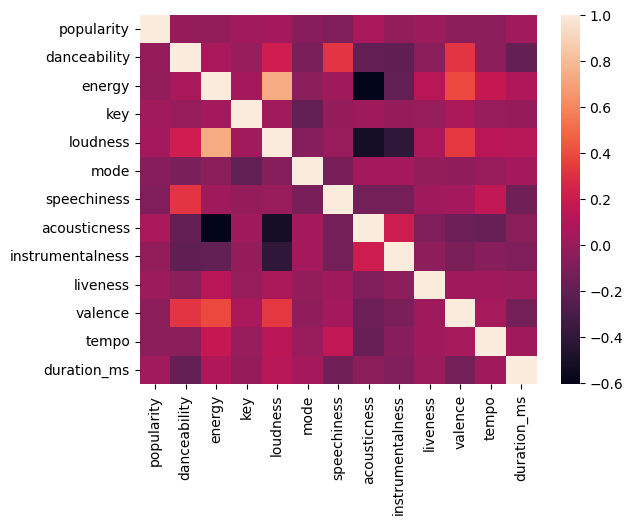

In [31]:
sns.heatmap(track_df.corr())

# 

### Displaying the most popular song in the track_df

In [32]:
track_df_pop = track_df[track_df['popularity'] == track_df['popularity'].max()] # Most popular song is the row with the highest popularity
track_df_pop['track_name'].tolist()

['Cruel Summer']

In [33]:
#Initializing a list for the most popular songs, its popularity and artist
track_df_popx = []
pop_df_popx = []
artist_df_popx = []

# Selecting the rows with the top 10 popularity
for x in range(0, 9, 1):
    tr = track_df[track_df['popularity'] == track_df['popularity'].max()-x]
    tracks = tr['track_name'].tolist()
    track_df_popx.append(tracks)
    pops = tr['popularity'].tolist()
    pop_df_popx.append(pops)
    artists = tr['artist_name'].tolist()
    artist_df_popx.append(artists)
#track_df_popx


# 

### Showing the top 6 Spotify tracks by popularity

In [34]:
pos = 0
spotify_top5songs = []
top5songs = []
for i, x in enumerate(track_df_popx): # Looping through the top songs by popularity
    if(x != []):
        pos += 1
        for j, y in enumerate(x): # Using the enumerate function to show the popularity positions of the songs
            #print(pos, y)
            position = pos, y
            top5songs.append(y)
            spotify_top5songs.append(position)
            data44 = data6[(data6['song'] == y) | (data6['chart_position'] == data6['chart_position'].min())]
spotify_top5songs

[(1, 'Cruel Summer'),
 (2, 'lovely (with Khalid)'),
 (2, 'Lover'),
 (2, 'Watermelon Sugar'),
 (2, 'Someone You Loved')]

### Comment
#### The number before each of the songs indicate their positions in the ranking
#### Cruel Summer is the most popular
#### The next 5 songs shared the second position
#### The remaining two songs in the list shared the third position

# 

### Showing the popularity of the top 8 songs

In [35]:
pos = 0
spotify_popularity = []
song_pop = []
for i, x in enumerate(pop_df_popx): # Looping through the top songs popularity
    if(x != []):
        pos += 1
        for j, y in enumerate(x): # Using the enumerate function to show the popularity positions
            #print(pos, y)
            position = pos, y
            song_pop.append(y)
            spotify_popularity.append(position)
            data44 = data6[(data6['song'] == y) | (data6['chart_position'] == data6['chart_position'].min())]
spotify_popularity

[(1, 99), (2, 91), (2, 91), (2, 91), (2, 91)]

# 

### Showing the top 5 Spotify performers by popularity

In [36]:
pos = 0
spotify_top5performers = []
top5performers = []
for i, x in enumerate(artist_df_popx): # Looping through the top artists popularity
    if(x != []):
        pos += 1
        for j, y in enumerate(x): # Using the enumerate function to show the popularity positions of the artists
            #print(pos, y)
            if (y in top5performers) == False:
                position = pos, y
                top5performers.append(y)
                spotify_top5performers.append(position)
            #data44 = data6[(data6['song'] == y) | (data6['chart_position'] == data6['chart_position'].min())]
spotify_top5performers

[(1, 'Taylor Swift'),
 (2, 'Billie Eilish'),
 (2, 'Harry Styles'),
 (2, 'Lewis Capaldi')]

### Comment
#### The number before each of the performers indicate their positions in the ranking
#### Taylor Swift is the most popular
#### The next 5 performers shared the second position
#### The remaining two performers in the list shared the third position

# 

### Combining the Billboard Hot 100 data with the Spotify data

### Getting the Billboard Hot 100 data

In [37]:
# Putting each column data into a new variable

chart_position = data4['chart_position'].tolist()
chart_date = data4['chart_date'].tolist()
song = data4['song'].tolist()
performer = data4['performer'].tolist()
instance = data4['instance'].tolist()
time_on_chart = data4['time_on_chart'].tolist()
consecutive_weeks = data4['consecutive_weeks'].tolist()
previous_week = data4['previous_week'].tolist()
peak_position = data4['peak_position'].tolist()
worst_position = data4['worst_position'].tolist()
year = data4['year'].tolist()
month = data4['month'].tolist()
day = data4['day'].tolist()


# 

### Getting the Spotify data

In [143]:
# Putting each column data into a new variable

popularity1 = []
danceability1 = []
energy1 = []
key1 = []
loudness1 = []
mode1 = []
speechiness1 = []
acousticness1 = []
instrumentalness1 = []
liveness1 = []
valence1 = []
tempo1 = []
duration_ms1 = []

# Listing the Spotify features of each song in the Billboard Hot 100
for x in song: # Song is the song title in the Billboard Hot 100 data
    
    pop = track_df['popularity'][track_df['track_name'] == x].tolist()
    if pop == []:
        popularity1.append(0)
    else:
        pop = str(pop)[1:-1]
        popularity1.append(pop)
    dance = track_df['danceability'][track_df['track_name'] == x].tolist()
    if dance == []:
        danceability1.append(0)
    else:
        dance = str(dance)[1:-1]
        danceability1.append(dance)
    ene = track_df['energy'][track_df['track_name'] == x].tolist()
    if ene == []:
        energy1.append(0)
    else:
        ene = str(ene)[1:-1]
        energy1.append(ene)
    ke = track_df['key'][track_df['track_name'] == x].tolist()
    if ke == []:
        key1.append(0)
    else:
        ke = str(ke)[1:-1]
        key1.append(ke)
    loud = track_df['loudness'][track_df['track_name'] == x].tolist()
    if loud == []:
        loudness1.append(0)
    else:
        loud = str(loud)[1:-1]
        loudness1.append(loud)
    mod = track_df['mode'][track_df['track_name'] == x].tolist()
    if mod == []:
        mode1.append(0)
    else:
        mod = str(mod)[1:-1]
        mode1.append(mod)
    speech = track_df['speechiness'][track_df['track_name'] == x].tolist()
    if speech == []:
        speechiness1.append(0)
    else:
        speech = str(speech)[1:-1]
        speechiness1.append(speech)
    acoustic = track_df['acousticness'][track_df['track_name'] == x].tolist()
    if acoustic == []:
        acousticness1.append(0)
    else:
        acoustic = str(acoustic)[1:-1]
        acousticness1.append(acoustic)
    instrumental = track_df['instrumentalness'][track_df['track_name'] == x].tolist()
    if instrumental == []:
        instrumentalness1.append(0)
    else:
        instrumental = str(instrumental)[1:-1]
        instrumentalness1.append(instrumental)
    live = track_df['liveness'][track_df['track_name'] == x].tolist()
    if live == []:
        liveness1.append(0)
    else:
        live = str(live)[1:-1]
        liveness1.append(live)
    val = track_df['valence'][track_df['track_name'] == x].tolist()
    if val == []:
        valence1.append(0)
    else:
        val = str(val)[1:-1]
        valence1.append(val)
    tem = track_df['tempo'][track_df['track_name'] == x].tolist()
    if tem == []:
        tempo1.append(0)
    else:
        tem = str(tem)[1:-1]
        tempo1.append(tem)
    dura = track_df['duration_ms'][track_df['track_name'] == x].tolist()
    if dura == []:
        duration_ms1.append(0)
    else:
        dura = str(dura)[1:-1]
        duration_ms1.append(dura)
    

# 

### Creating a new column showing if a song made it to the top 10 in the Billboard Hot 100

In [144]:
# Initializing a list to show if a song made it to the top 10 or not
top_10 = []

for x in data4.iterrows():
    if x[1]['peak_position'] < 11:
        top_10.append(1)
    else:
        top_10.append(0)

# 

### Creating a new dataframe joining the Billboard Hot 100 data and Spotify data

In [145]:
# Creating a new dataframe showing all the songs showing both features in Billboard Hot 100 and Spotify

all_df = pd.DataFrame({'top_10' : top_10, 'chart_position' : chart_position, 'chart_date' : chart_date, 'song' : song, 'performer' : performer,
                                'ínstance' : instance, 'time_on_chart' : time_on_chart, 'consecutive_weeks' : consecutive_weeks,
                                'previous_week' : previous_week, 'peak_position' : peak_position, 'worst_position' : worst_position,
                                'year' : year, 'month' : month, 'day' : day, 'popularity' : popularity1, 'danceability' : danceability1, 'energy' : energy1,
                                'key' : key1, 'loudness' : loudness1, 'mode' : mode1, 'speechiness' : speechiness1,
                                'acousticness' : acousticness1, 'instrumentalness' : instrumentalness1, 'liveness' : liveness1,
                                'valence' : valence1, 'tempo' : tempo1, 'duration_ms' : duration_ms1})
print(all_df.shape)
all_df.head()

(10400, 27)


,top_10,chart_position,chart_date,song,performer,ínstance,time_on_chart,consecutive_weeks,previous_week,peak_position,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0,39,2020-12-26,'Tis The Damn Season,Taylor Swift,1.0,1,0.0,0.0,39,...,0,0,0,0,0,0,0,0,0,0
1,0,32,2019-01-05,(There's No Place Like) Home For The Holidays,Perry Como,1.0,2,1.0,41.0,32,...,0,0,0,0,0,0,0,0,0,0
2,0,37,2020-01-04,(There's No Place Like) Home For The Holidays,Perry Como,2.0,3,0.0,0.0,32,...,0,0,0,0,0,0,0,0,0,0
3,0,47,2020-12-12,(There's No Place Like) Home For The Holidays,Perry Como,3.0,4,0.0,0.0,32,...,0,0,0,0,0,0,0,0,0,0
4,0,37,2020-12-19,(There's No Place Like) Home For The Holidays,Perry Como,3.0,5,1.0,47.0,32,...,0,0,0,0,0,0,0,0,0,0


# 

### Converting the data from Spotify into numeric data

In [146]:
# The data needs to be converted to numeric because it will be used in training the model

all_df[['popularity', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']] = all_df[['popularity', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']].apply(pd.to_numeric, errors='coerce')

# 

### Replacing the empty values with zero

In [147]:
all_df = all_df.replace(np.nan,0,regex = True)


# 

### Removing rows with zero values in danceability or energy: To remove rows that did not join properly

In [148]:
indexZeros = all_df[ (all_df['danceability'] == 0) | (all_df['energy'] == 0) ].index
all_df.drop(indexZeros , inplace=True)


In [149]:
print(all_df.shape)
all_df.head()

(3460, 27)


,top_10,chart_position,chart_date,song,performer,ínstance,time_on_chart,consecutive_weeks,previous_week,peak_position,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
6,0,97,2019-09-28,"1, 2 Many",Luke Combs & Brooks & Dunn,1.0,1,0.0,0.0,97,...,6.0,-3.789,1.0,0.0873,0.039700,0.000000,0.423,0.685,148.798,180907.0
7,0,86,2019-01-05,1.5,21 Savage,1.0,1,0.0,0.0,86,...,1.0,-8.353,1.0,0.3590,0.000244,0.000001,0.454,0.306,84.022,148656.0
124,0,60,2019-12-07,6 Kiss,Trippie Redd Featuring Juice WRLD & YNW Melly,1.0,1,0.0,0.0,60,...,2.0,-10.061,1.0,0.1540,0.109000,0.000000,0.282,0.229,142.048,199437.0
125,0,80,2019-12-14,6 Kiss,Trippie Redd Featuring Juice WRLD & YNW Melly,1.0,2,1.0,60.0,60,...,2.0,-10.061,1.0,0.1540,0.109000,0.000000,0.282,0.229,142.048,199437.0
126,0,78,2019-12-21,6 Kiss,Trippie Redd Featuring Juice WRLD & YNW Melly,1.0,3,2.0,80.0,60,...,2.0,-10.061,1.0,0.1540,0.109000,0.000000,0.282,0.229,142.048,199437.0


# 

### A description of the combined dataframe

In [150]:
all_df.describe()

,top_10,chart_position,ínstance,time_on_chart,consecutive_weeks,previous_week,peak_position,worst_position,year,month,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,3460.000000,3460.000000,3460.000000,3460.000000,3460.000000,3460.000000,3460.000000,3460.000000,3460.000000,3460.000000,...,3460.000000,3460.000000,3460.000000,3460.000000,3460.000000,3460.000000,3460.000000,3460.000000,3460.000000,3460.000000
mean,0.255491,48.697110,1.260983,14.543642,12.617052,41.715029,35.472543,76.216474,2019.317630,6.121965,...,5.539017,-5.876969,0.612139,0.108783,0.207291,0.005987,0.163359,0.518804,116.563238,193396.736416
std,0.436200,27.961226,0.623648,11.902859,11.789490,28.891624,27.721065,24.566086,0.465622,3.404015,...,3.686694,2.009532,0.487333,0.110704,0.209322,0.049964,0.124761,0.199046,27.941415,36226.504243
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2019.000000,1.000000,...,0.000000,-14.454000,0.000000,0.025800,0.000244,0.000000,0.042600,0.037000,59.635000,88187.000000
25%,0.000000,25.000000,1.000000,5.000000,3.000000,17.000000,10.000000,60.000000,2019.000000,3.000000,...,2.000000,-7.050000,0.000000,0.037600,0.037300,0.000000,0.096300,0.386000,96.002000,173325.000000
50%,0.000000,47.000000,1.000000,12.000000,9.000000,40.000000,32.000000,85.000000,2019.000000,6.000000,...,6.000000,-5.806000,1.000000,0.058800,0.129000,0.000000,0.115000,0.530000,111.516500,195147.000000
75%,1.000000,72.000000,1.000000,20.000000,18.000000,66.000000,57.000000,96.000000,2020.000000,9.000000,...,9.000000,-4.476000,1.000000,0.127000,0.313000,0.000003,0.181000,0.650000,137.958000,214851.000000
max,1.000000,100.000000,5.000000,61.000000,60.000000,100.000000,100.000000,100.000000,2020.000000,12.000000,...,11.000000,-2.188000,1.000000,0.588000,0.902000,0.918000,0.790000,0.962000,204.132000,391829.000000


# 

### Showing the correlation between the columns in all_df

In [151]:
all_df.corr()

,top_10,chart_position,ínstance,time_on_chart,consecutive_weeks,previous_week,peak_position,worst_position,year,month,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
top_10,1.000000,-0.612829,-0.111277,0.579224,0.586374,-0.483805,-0.683181,-0.541184,0.050125,-0.040463,...,-0.076492,0.034577,-0.149777,-0.052789,-0.084858,0.061126,-0.002612,0.039413,-0.111062,-0.029460
chart_position,-0.612829,1.000000,0.075392,-0.485576,-0.499174,0.661000,0.835017,0.540297,-0.100793,0.028056,...,0.027167,-0.032564,0.127457,0.079809,0.023514,-0.038972,0.004746,-0.039398,0.133673,0.093644
ínstance,-0.111277,0.075392,1.000000,0.091798,-0.059774,0.040615,0.062530,0.329406,0.109693,-0.013500,...,-0.024989,0.087933,0.085837,-0.112416,0.031269,-0.038915,-0.099181,-0.045464,-0.159869,0.068282
time_on_chart,0.579224,-0.485576,0.091798,1.000000,0.952354,-0.273312,-0.642533,-0.170790,0.160430,-0.027688,...,-0.037400,0.070903,-0.034510,-0.112711,0.054562,0.047794,-0.050283,-0.013561,-0.128049,0.067503
consecutive_weeks,0.586374,-0.499174,-0.059774,0.952354,1.000000,-0.270028,-0.634906,-0.213807,0.125440,-0.013265,...,-0.004661,0.065736,-0.042263,-0.106379,0.056146,0.055891,-0.046865,-0.032735,-0.122618,0.069476
previous_week,-0.483805,0.661000,0.040615,-0.273312,-0.270028,1.000000,0.542647,0.478448,-0.057160,-0.009885,...,0.038700,-0.006670,0.122922,0.054915,0.007946,-0.073977,0.009630,-0.000970,0.079948,0.072319
peak_position,-0.683181,0.835017,0.062530,-0.642533,-0.634906,0.542647,1.000000,0.545302,-0.105277,-0.008567,...,0.066083,-0.039211,0.141586,0.015372,0.050767,-0.049922,-0.030068,-0.023445,0.115646,0.105064
worst_position,-0.541184,0.540297,0.329406,-0.170790,-0.213807,0.478448,0.545302,1.000000,0.019994,-0.029691,...,0.046864,-0.048367,0.127926,0.016539,0.155485,0.020795,-0.068189,-0.014848,-0.089002,0.057272
year,0.050125,-0.100793,0.109693,0.160430,0.125440,-0.057160,-0.105277,0.019994,1.000000,-0.242599,...,0.145783,0.067079,-0.045536,-0.096687,-0.012426,-0.068666,0.104553,0.081732,0.003276,0.095339
month,-0.040463,0.028056,-0.013500,-0.027688,-0.013265,-0.009885,-0.008567,-0.029691,-0.242599,1.000000,...,-0.085915,0.040297,0.025562,-0.013305,-0.007439,0.013535,0.009512,0.082870,0.033025,-0.082660


# 

### Showing the percentage and ratio of the songs in the top 10 compared to those not in the top 10

In [152]:

alldf_count = all_df['top_10'].count() # A count of all the rows in all_df
pos_count = all_df['top_10'][all_df['top_10'] == 1].count() # A count of all the rows in top 10
neg_count = all_df['top_10'][all_df['top_10'] == 0].count() # A count of all the rows not in the top 10

percent_poscount = round((pos_count / alldf_count) * 100, 2) # The percentage of rows in the top 10
percent_negcount = round((neg_count / alldf_count) * 100, 2) # The percentage of rows not in the top 10

division = max(percent_poscount, percent_negcount) / min(percent_poscount, percent_negcount)
ratio_df = division.as_integer_ratio() # The ratio of those not in the top 5 to those in the top 10
ratio1 = int(ratio_df[0]/100000000000000)
ratio2 = int(ratio_df[1]/100000000000000)

print('The percentage of songs in the top 10 is ' + str(percent_poscount) + '%')
print('The percentage of songs not in the top 10 is ' + str(percent_negcount) + '%')
print('The ratio between the those in top 10 and those that are not is ' + str(ratio1) + ' : ' + str(ratio2) + '.')

The percentage of songs in the top 10 is 25.55%
The percentage of songs not in the top 10 is 74.45%
The ratio between the those in top 10 and those that are not is 65 : 22.


# 

# 

## Exploratory Data Analysis

# 

### Graph showing the top 5 songs and their popularity

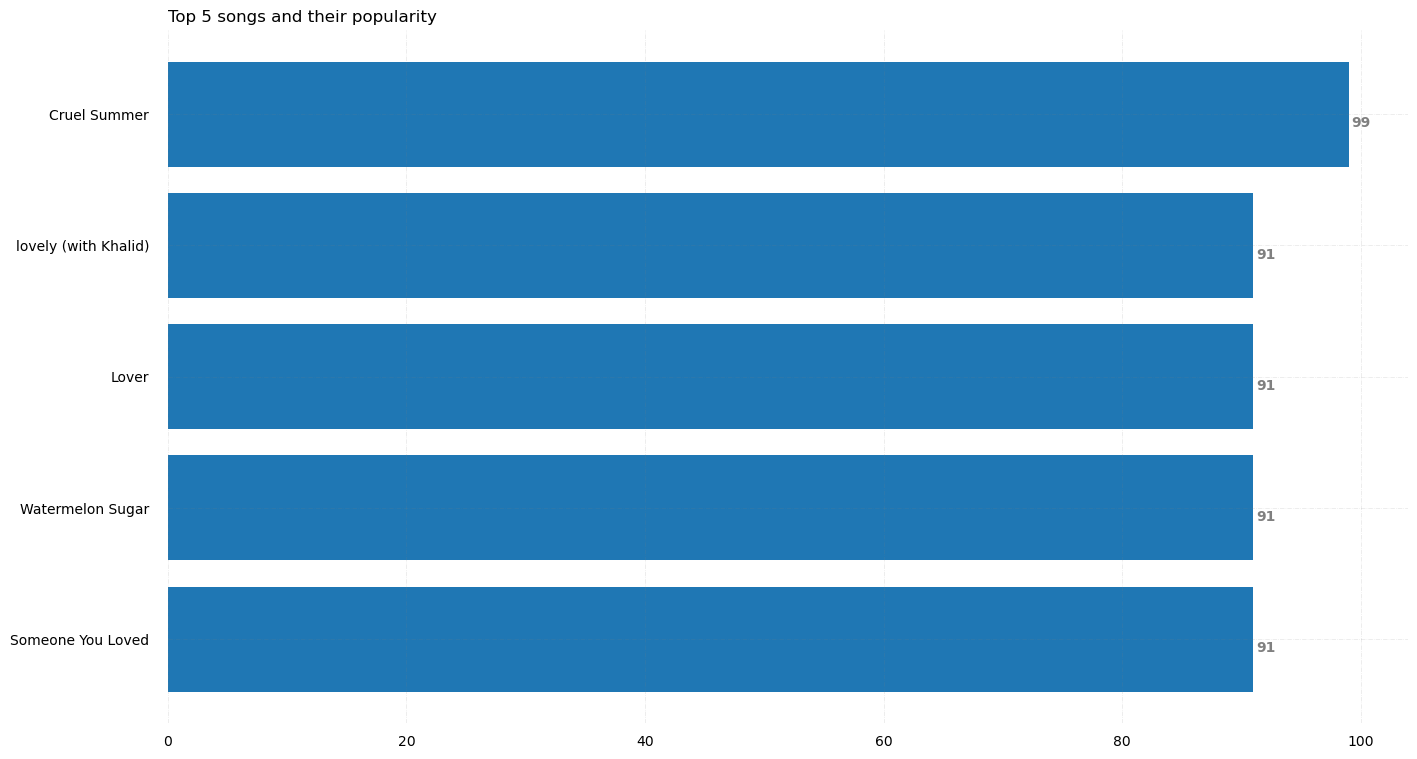

In [153]:
# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))
 
# Horizontal Bar Plot
ax.barh(top5songs, song_pop)
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')

# Add plot title

ax.set_title('Top 5 songs and their popularity',
             loc ='left', )
 
# Show Plot
plt.show()

# 

### Comments:
#### Cruel summer is the most popular song with a popularity of 99.
#### The rest of the songs in the top 5 have the same popularity of 91.

# 

### Visualizing the correlation between the columns in all_df

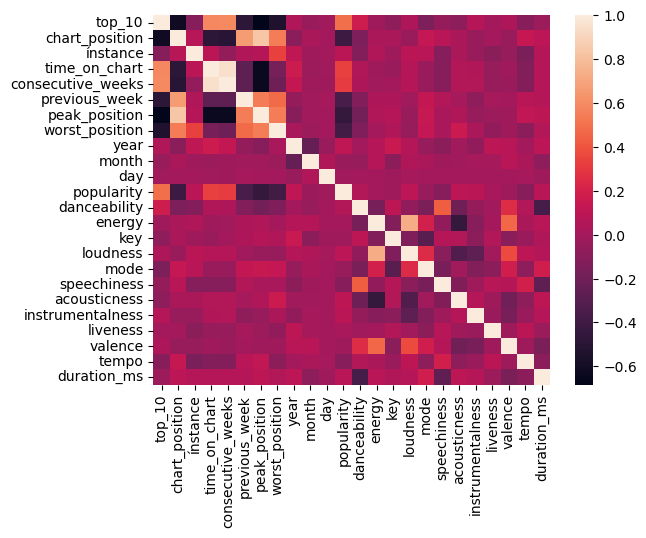

In [154]:
sns.heatmap(all_df.corr())
plt.show()

# 

### A scatter plot showing the popularity against the peak position

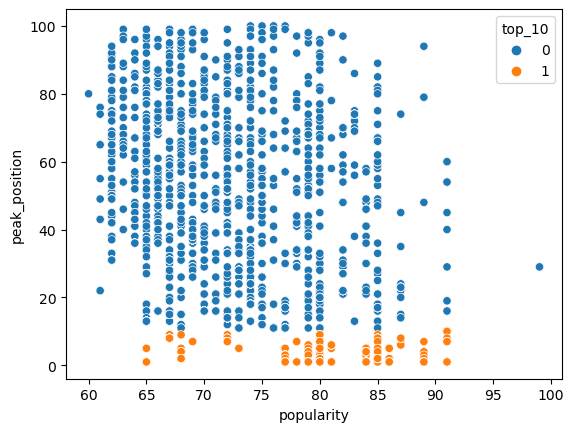

In [198]:
sns.scatterplot(x = 'popularity', y = 'peak_position', data = all_df, hue = 'top_10')
plt.show()

# 

### Comments:
#### The above scatter plot has no statistical significance. This means that the increase in Spotify song popularity does not have any impact in the song's position in the Billboard Hot 100.

# 

### A scatter plot showing the danceability against the peak position

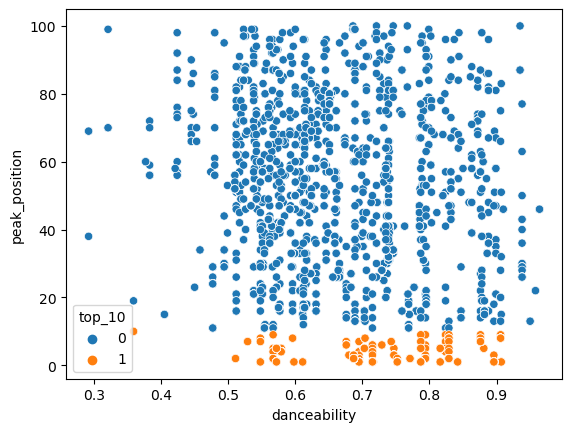

In [199]:
sns.scatterplot(x = 'danceability', y = 'peak_position', data = all_df, hue = 'top_10')
plt.show()

# 

### Comments:
#### The above scatter plot has no statistical significance. This means that the increase in Spotify song danceability does not have any impact in the song's position in the Billboard Hot 100.

#### Since the Spotify song features have a weak correlation with the peak position and the scatterplots of its features have no statistical significance, then, it means that the Spotify song features have no direct impact on the peak position.

# 

### A line plot showing the time_on_chart against speechiness

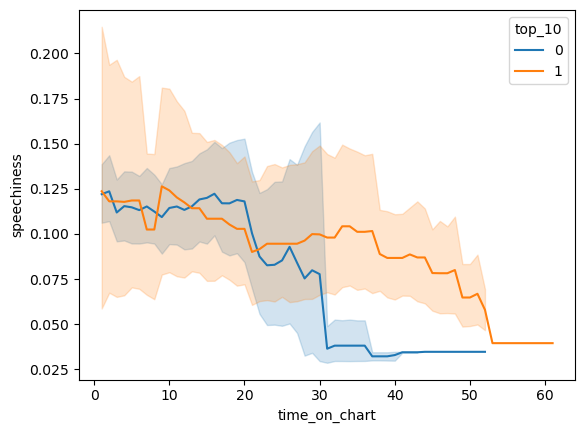

In [299]:
sns.lineplot(x = 'time_on_chart', y = 'speechiness', data = all_df, hue = 'top_10')
plt.show()

### Comments:
#### It can be observed that songs with lower speechiness(more distinct words) have a greater chance of staying longer on the Billboard Hot 100 chart.

# 

### A bar chart showing the number of songs in the top 10 and the number of songs not in the top 10

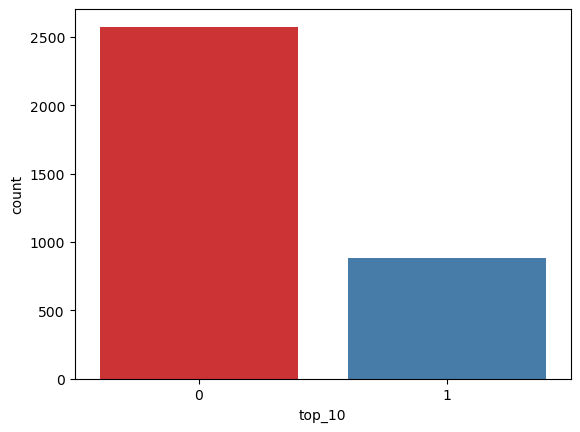

In [51]:
sns.countplot(x= 'top_10', data= all_df, palette = 'Set1')

plt.show()

# 

### Comments:
#### The bar chart shows that the number of the songs that did not make it to the top 10 is more than twice the number of the songs that made it to the top 10 in the Billboard Hot 100
#### The bar chart shows that the data is imbalanced.

# 

### A bar chart showing the number of songs in the top 10 and the number of songs not in the top 10 in the month of December

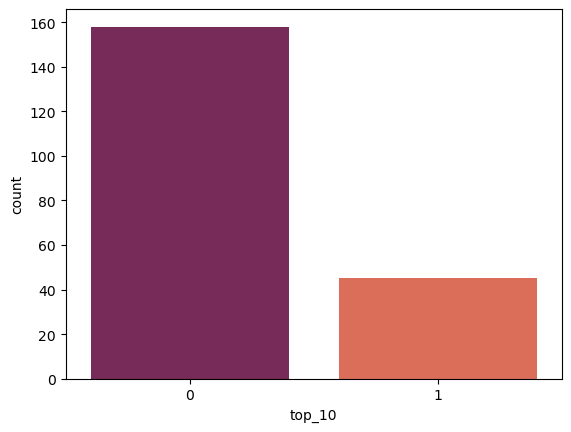

In [52]:
sns.countplot(x= 'top_10', data= all_df[all_df['month'] == 12], palette = 'rocket')

plt.show()

# 

### Comments:
#### The above bar chart shows the number of songs for only the month of December.
#### The bar chart shows that the number of the songs that did not make it to the top 10 is more than twice the number of the songs that made it to the top 10 in the Billboard Hot 100
#### The bar chart shows that the data is imbalanced.

# 

### A boxplot of the popularity for the songs in the top 10 and the songs not in the top 10

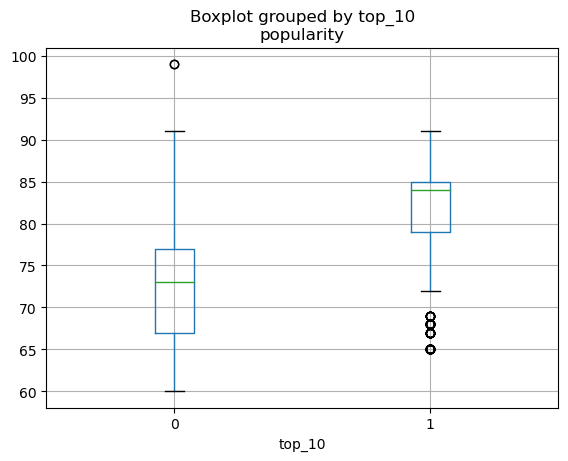

In [203]:
all_df.boxplot(by ='top_10', column =['popularity'], grid = True)

plt.show()

# 

### Comments:
#### Observations from the songs' popularity that did not make it to the top 10;
#### 1. It has a maximum popularity of 92.
#### 2. It has a minimum popularity of 60.
#### 3. It has an interquartile range of 67 to 77.
#### 4. It has a first quartile of 67.
#### 5. It has a third quartile of 77.
#### 6. It has a median of 73.

#### Observations from the songs' popularity that made it to the top 10;
#### 1. It has a maximum popularity of 92.
#### 2. It has a minimum popularity of 72.
#### 3. It has an interquartile range of 79 to 85.
#### 4. It has a first quartile of 79.
#### 5. It has a third quartile of 85.
#### 6. It has a median of 84.
#### 7. It has some outliers below the minimum.

# 

### A boxplot of the danceability for the songs in the top 10 and the songs not in the top 10

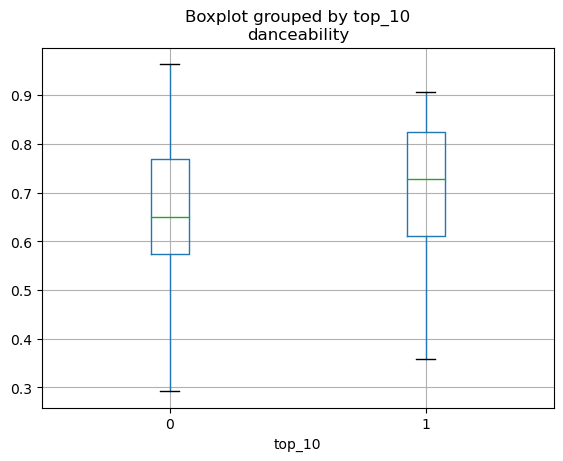

In [202]:
all_df.boxplot(by ='top_10', column =['danceability'], grid = True)

plt.show()

# 

### Comments:
#### Observations from the songs' danceability that did not make it to the top 10;
#### 1. It has a maximum danceability of 0.97.
#### 2. It has a minimum danceability of 0.29.
#### 3. It has an interquartile range of 0.57 to 0.77.
#### 4. It has a first quartile of 0.57.
#### 5. It has a third quartile of 0.77.
#### 6. It has a median of 0.65.

#### Observations from the songs' danceability that made it to the top 10;
#### 1. It has a maximum danceability of 0.91.
#### 2. It has a minimum danceability of 0.36.
#### 3. It has an interquartile range of 0.61 to 0.82.
#### 4. It has a first quartile of 0.61.
#### 5. It has a third quartile of 0.82.
#### 6. It has a median of 0.72.

# 

### A boxplot of the time_on_chart for the songs in the top 10 and the songs not in the top 10

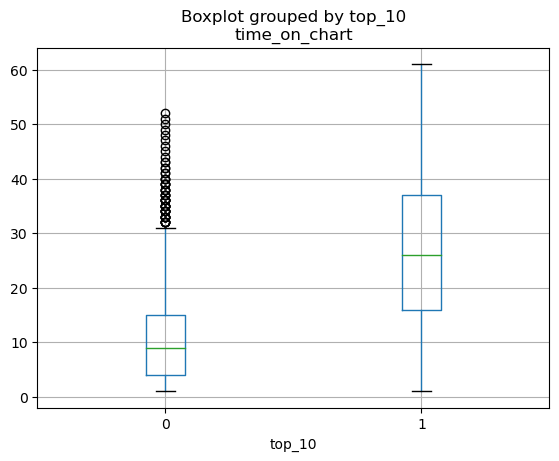

In [204]:
all_df.boxplot(by ='top_10', column =['time_on_chart'], grid = True)

plt.show()

# 

### Comments:
#### Observations from the songs' time_on_chart that did not make it to the top 10;
#### 1. It has a maximum time_on_chart of 31.
#### 2. It has a minimum time_on_chart of 1.
#### 3. It has an interquartile range of 3 to 15.
#### 4. It has a first quartile of 3.
#### 5. It has a third quartile of 15.
#### 6. It has a median of 9.
#### 7. It has some outliers above the maximum.

#### Observations from the songs' time_on_chart that made it to the top 10;
#### 1. It has a maximum time_on_chart of 61.
#### 2. It has a minimum time_on_chart of 1.
#### 3. It has an interquartile range of 16 to 38.
#### 4. It has a first quartile of 16.
#### 5. It has a third quartile of 38.
#### 6. It has a median of 26.

#### It can be observed that on average, the higher the time_on_chart, the more likely the song will make it to the top 10 songs in the Billboard Hot 100.

# 

### A boxplot of the energy for the songs in the top 10 and the songs not in the top 10

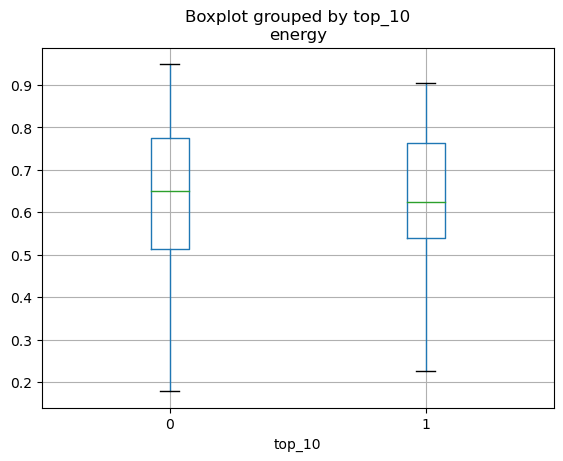

In [288]:
all_df.boxplot(by ='top_10', column =['energy'], grid = True)

plt.show()

### Comments:
#### Theres is no statistical significance in the result above

### A boxplot of the speechiness for the songs in the top 10 and the songs not in the top 10

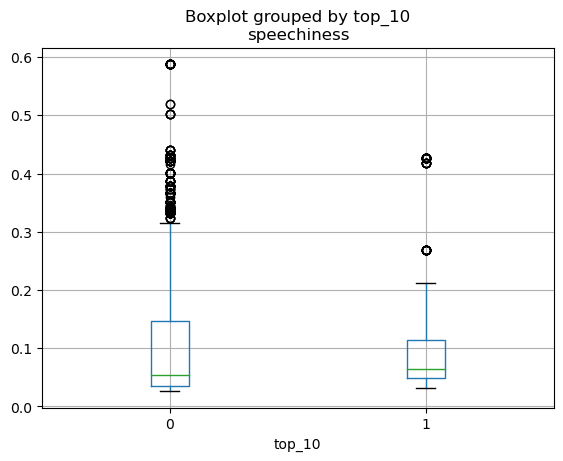

In [294]:
all_df.boxplot(by ='top_10', column =['speechiness'], grid = True)

plt.show()

### Comments:
#### Observations from the songs' speechiness that did not make it to the top 10;
#### 1. It has a maximum speechiness of 0.31.
#### 2. It has a minimum speechiness of 0.02.
#### 3. It has an interquartile range of 0.03 to 0.15.
#### 4. It has a first quartile of 0.03.
#### 5. It has a third quartile of 0.15.
#### 6. It has a median of 0.05.
#### 7. It has many outliers above the maximum.

#### Observations from the songs' speechiness that made it to the top 10;
#### 1. It has a maximum speechiness of 0.21.
#### 2. It has a minimum speechiness of 0.04.
#### 3. It has an interquartile range of 0.05 to 0.11.
#### 4. It has a first quartile of 0.05.
#### 5. It has a third quartile of 0.11.
#### 6. It has a median of 0.06.
#### 7. It has few outliers above the maximum.

#### It can be observed that on average, the lower the speechiness, the more likely the song will make it to the top 10 songs in the Billboard Hot 100.

# 

### A boxplot of the tempo for the songs in the top 10 and the songs not in the top 10

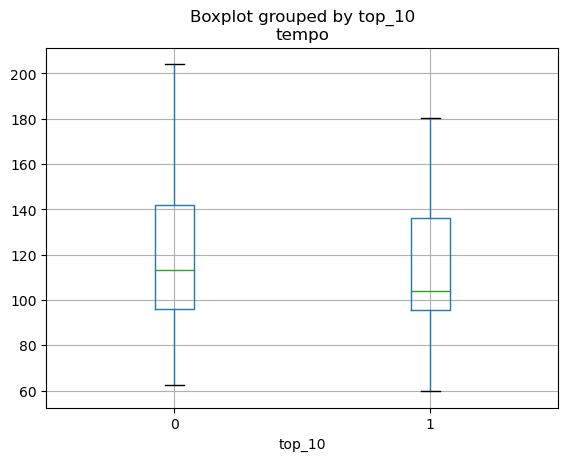

In [295]:
all_df.boxplot(by ='top_10', column =['tempo'], grid = True)

plt.show()

### Comments:
#### Observations from the songs' tempo that did not make it to the top 10;
#### 1. It has a maximum tempo of around 205.
#### 2. It has a minimum tempo of around 62.
#### 3. It has an interquartile range of around 95 to 142.
#### 4. It has a first quartile of around 95.
#### 5. It has a third quartile of around 142.
#### 6. It has a median of around 115.

#### Observations from the songs' tempo that made it to the top 10;
#### 1. It has a maximum tempo of 180.
#### 2. It has a minimum tempo of 60.
#### 3. It has an interquartile range of around 95 to 138.
#### 4. It has a first quartile of around 95.
#### 5. It has a third quartile of around 138.
#### 6. It has a median of around 105.

#### It can be observed that on average, the lower the tempo, the more likely the song will make it to the top 10 songs in the Billboard Hot 100.

# 

# Feature Engineering and Selection

# 

### Assigning the predictors into X

In [205]:

X = all_df.drop(columns=['top_10', 'chart_position', 'peak_position', 'worst_position', 'previous_week', 'consecutive_weeks', 'chart_date', 'song', 'performer', 'ínstance',
                                'year', 'day'])
X.head(5)

,time_on_chart,month,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
6,1,9,76.0,0.540,0.821,6.0,-3.789,1.0,0.0873,0.039700,0.000000,0.423,0.685,148.798,180907.0
7,1,1,64.0,0.885,0.520,1.0,-8.353,1.0,0.3590,0.000244,0.000001,0.454,0.306,84.022,148656.0
124,1,12,67.0,0.687,0.449,2.0,-10.061,1.0,0.1540,0.109000,0.000000,0.282,0.229,142.048,199437.0
125,2,12,67.0,0.687,0.449,2.0,-10.061,1.0,0.1540,0.109000,0.000000,0.282,0.229,142.048,199437.0
126,3,12,67.0,0.687,0.449,2.0,-10.061,1.0,0.1540,0.109000,0.000000,0.282,0.229,142.048,199437.0


# 

### Reasons for choosing the predictors:
#### The time_on_chart from the Billboard Hot 100 data was selected because of its relevance and it has a high posiive correlation with the top_10 class with a correlation of 0.579.
#### All the Spotify song features, including its popularity have no direct impact on the top_10 class but a combination of all of them do have a significant impact in predicting the top_10 class.

# 

### Assigning top_10(the target variable) into y

In [206]:
y = all_df['top_10']
y.head(5)

6      0
7      0
124    0
125    0
126    0
Name: top_10, dtype: int64

# 

# 

# Model Development and Training

# 

### Splitting the data into testing and training data

### First training and test data with 70% training size

In [207]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size = 0.3) #Using 70% for training and 30% for testing.

# 

### Second training and test data with 80% training size

In [208]:
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y, test_size = 0.2) #Using 80% for training and 20% for testing.

# 

### Balancing the first training data with 70% training size

In [209]:
print("Before OverSampling, counts of label '1': {}".format(sum(y1_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y1_train == 0)))
  
# import SMOTE module from imblearn library

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 42)
X1_train_res, y1_train_res = sm.fit_resample(X1_train, y1_train.ravel())
  
print('After OverSampling, the shape of train_X: {}'.format(X1_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y1_train_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y1_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y1_train_res == 0)))

Before OverSampling, counts of label '1': 627
Before OverSampling, counts of label '0': 1795 

After OverSampling, the shape of train_X: (3590, 15)
After OverSampling, the shape of train_y: (3590,) 

After OverSampling, counts of label '1': 1795
After OverSampling, counts of label '0': 1795


# 

### Balancing the second training data with 80% training size

In [210]:
print("Before OverSampling, counts of label '1': {}".format(sum(y2_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y2_train == 0)))
  
# import SMOTE module from imblearn library

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 42)
X2_train_res, y2_train_res = sm.fit_resample(X2_train, y2_train.ravel())
  
print('After OverSampling, the shape of train_X: {}'.format(X2_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y2_train_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y2_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y2_train_res == 0)))

Before OverSampling, counts of label '1': 701
Before OverSampling, counts of label '0': 2067 

After OverSampling, the shape of train_X: (4134, 15)
After OverSampling, the shape of train_y: (4134,) 

After OverSampling, counts of label '1': 2067
After OverSampling, counts of label '0': 2067


# 

# 

### Training the Extreme Gradient Boosting model using the training data

### Advantages of the Extreme Gradient Boosting model:
#### High Accuracy: Outperformed the other two models in nearly all metrics.
#### Handles imbalance well: Even before data balancing, it achieved high scores.
#### Resilient to overfitting: Gradient boosting methods generally handle overfitting better due to the way they are constructed.
### Disadvantages of the Extreme Gradient Boosting model:
#### Complexity: Might be overkill for simpler datasets.
#### Computationally expensive: Especially with larger datasets.

In [211]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, confusion_matrix

# 

### Training with the imbalanced 70% training data

In [212]:
# fit model no training data
xgb_model1 = XGBClassifier(random_state = 42)
xgb_model1.fit(X1_train, y1_train)
# make predictions for test data
xgb_y_pred1 = xgb_model1.predict(X1_test)

# 

### Training with the imbalanced 80% training data

In [213]:
# fit model no training data
xgb_model2 = XGBClassifier(random_state = 42)
xgb_model2.fit(X2_train, y2_train)
# make predictions for test data
xgb_y_pred2 = xgb_model2.predict(X2_test)

# 

### Training with the balanced 70% training data

In [214]:
# fit model no training data
xgb_model3 = XGBClassifier(random_state = 42)
xgb_model3.fit(X1_train_res, y1_train_res)
# make predictions for test data
xgb_y_pred3 = xgb_model3.predict(X1_test)

# 

### Training with the balanced 80% training data

In [215]:
# fit model no training data
xgb_model4 = XGBClassifier(random_state = 42)
xgb_model4.fit(X2_train_res, y2_train_res)
# make predictions for test data
xgb_y_pred4 = xgb_model4.predict(X2_test)

# 

### Training the DecisionTree Classifier model using the training dataset

# 

### Advantages of the DecisionTree Classifier model:
#### Interpretability: The decision tree is easy to understand and visualize.
#### Feature Importance: Provides insights into key features (like time_on_chart and popularity).
### Disadvantages of the DecisionTree Classifier model:
#### Prone to overfitting: Especially with deep trees.
#### Variability: Small changes in data might result in a different tree.

# 

### Training with the imbalanced 70% training data

In [249]:
from sklearn.tree import DecisionTreeClassifier
dt_model1 = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
dt_model1.fit(X1_train, y1_train)
dt_y_pred1 = dt_model1.predict(X1_test)

# 

### Training with the imbalanced 80% training data

In [217]:
from sklearn.tree import DecisionTreeClassifier
dt_model2 = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
dt_model2.fit(X2_train, y2_train)
dt_y_pred2 = dt_model2.predict(X2_test)

# 

### Training with the balanced 70% training data

In [218]:
from sklearn.tree import DecisionTreeClassifier
dt_model3 = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
dt_model3.fit(X1_train_res, y1_train_res)
dt_y_pred3 = dt_model3.predict(X1_test)

# 

### Training with the balanced 80% training data

In [219]:
from sklearn.tree import DecisionTreeClassifier
dt_model4 = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
dt_model4.fit(X2_train_res, y2_train_res)
dt_y_pred4 = dt_model4.predict(X2_test)

# 

### Training the Logistic Regression model using the training dataset

# 

### Advantages of the Logistic Regression model:
#### Simplicity: It's easy to implement and understand.
#### Provides probability scores: Useful for ranking predictions.
### Disadvantages of the Logistic Regression model:
#### Assumes linear decision boundary: Might not capture complex relationships.
#### Poorer performance: Lower accuracy and F1 score compared to gradient boosting.

# 

### Training with the imbalanced 70% training data

In [220]:
from sklearn.linear_model import LogisticRegression
log_model1 = LogisticRegression(random_state=42)
log_model1.fit(X1_train, y1_train)
log_y_pred1 = log_model1.predict(X1_test)

# 

### Training with the imbalanced 80% training data

In [221]:
from sklearn.linear_model import LogisticRegression
log_model2 = LogisticRegression(random_state=42)
log_model2.fit(X2_train, y2_train)
log_y_pred2 = log_model2.predict(X2_test)

# 

### Training with the balanced 70% training data

In [222]:
log_model3 = LogisticRegression(random_state=42)
log_model3.fit(X1_train_res, y1_train_res)
log_y_pred3 = log_model3.predict(X1_test)

# 

### Training with the balanced 80% training data

In [223]:
log_model4 = LogisticRegression(random_state=42)
log_model4.fit(X2_train_res, y2_train_res)
log_y_pred4 = log_model4.predict(X2_test)

# 

# 

## Model Evaluation

# 

### Evaluation of the Extreme Gradient Boosting model

# 

### Evaluation of the imbalanced 70% training data

In [224]:
xgb_precision_score1 = round(precision_score(y1_test, xgb_y_pred1) * 100, 2)
xgb_recall_score1 = round(recall_score(y1_test, xgb_y_pred1) * 100, 2)
xgb_f1_score1 = round(f1_score(y1_test, xgb_y_pred1) * 100, 2)
xgb_accuracy_score1 = round(accuracy_score(y1_test, xgb_y_pred1) * 100, 2)

xgb_confusion_matrix1 = confusion_matrix(y1_test, xgb_y_pred1)
print("Confusion matrix")
print(xgb_confusion_matrix1)

print("")

print('Precision: ' + str(xgb_precision_score1) + '%')
print('Recall: ' + str(xgb_recall_score1) + '%')
print('F1: ' + str(xgb_f1_score1) + '%')
print('Accuracy: ' + str(xgb_accuracy_score1) + '%')

Confusion matrix
[[777   4]
 [  2 255]]

Precision: 98.46%
Recall: 99.22%
F1: 98.84%
Accuracy: 99.42%


### This confusion matrix can be broken down as follows:

#### True Positive (TP): 255
#### The model correctly predicted the positive class 255 times.
#### The model correctly predicted the positive class 255 times.
#### True Negative (TN): 777
#### The model correctly predicted the negative class 777 times.
#### False Positive (FP): 4
#### The model incorrectly predicted the positive class 4 times.
#### False Negative (FN): 2
#### The model incorrectly predicted the negative class 2 times.

#### Performance Metrics:

#### Accuracy:

#### (TP + TN) / (TP + TN + FP + FN)
#### (255 + 777) / (255 + 777 + 4 + 2) = 1032/1038 = 0.9942 or 99.42%
#### Precision (Positive Predictive Value):

#### TP / (TP + FP)
#### 255 / (255 + 4) = 255/259 = 0.9846 or 98.46%
#### Recall or Sensitivity (True Positive Rate):

#### TP / (TP + FN)
#### 255 / (255 + 2) = 255/257 = 0.9922 or 99.22%

#### Specificity (True Negative Rate):

#### TN / (TN + FP)
#### 777 / (777 + 4) = 777/781 = 0.9949 or 99.49%
#### F1 Score:

#### 2 * (Precision * Recall) / (Precision + Recall)
#### 2 * (0.9846 * 0.9922) / (0.9846 + 0.9922) = 0.9884 or 98.84%

#### These results are biased because there is an imbalance in both the training and testing data.

# 

### Evaluation of the imbalanced 80% training data

In [225]:
xgb_precision_score2 = round(precision_score(y2_test, xgb_y_pred2) * 100, 2)
xgb_recall_score2 = round(recall_score(y2_test, xgb_y_pred2) * 100, 2)
xgb_f1_score2 = round(f1_score(y2_test, xgb_y_pred2) * 100, 2)
xgb_accuracy_score2 = round(accuracy_score(y2_test, xgb_y_pred2) * 100, 2)

xgb_confusion_matrix2 = confusion_matrix(y2_test, xgb_y_pred2)
print("Confusion matrix")
print(xgb_confusion_matrix2)

print("")

print('Precision: ' + str(xgb_precision_score2) + '%')
print('Recall: ' + str(xgb_recall_score2) + '%')
print('F1: ' + str(xgb_f1_score2) + '%')
print('Accuracy: ' + str(xgb_accuracy_score2) + '%')

Confusion matrix
[[507   2]
 [  2 181]]

Precision: 98.91%
Recall: 98.91%
F1: 98.91%
Accuracy: 99.42%


### This confusion matrix represents the following:

#### True Positive (TP): 181
#### The number of positive cases (typically the minority class in imbalanced datasets) that the model correctly predicted as positive.
#### True Negative (TN): 507
#### The number of negative cases (typically the majority class in imbalanced datasets) that the model correctly predicted as negative.
#### False Positive (FP): 2
#### The number of negative cases that the model incorrectly predicted as positive. Also known as Type I error.
#### False Negative (FN): 2
#### The number of positive cases that the model incorrectly predicted as negative. Also known as Type II error.

#### Performance Metrics:

#### Accuracy:

#### (TP + TN) / (TP + TN + FP + FN)
#### (181 + 507) / (181 + 507 + 2 + 2) = 688/692 = 0.9942 or 99.42%

#### Precision (Positive Predictive Value):

#### TP / (TP + FP)
#### 181 / (181 + 2) = 181/183 = 0.9891 or 98.91%
#### Recall or Sensitivity (True Positive Rate):

#### TP / (TP + FN)
#### 181 / (181 + 2) = 181/183 = 0.9891 or 98.91%
#### Specificity (True Negative Rate):

#### TN / (TN + FP)
#### 507 / (507 + 2) = 507/509 = 0.9961 or 99.61%
#### F1 Score:

#### 2 * (Precision * Recall) / (Precision + Recall)
#### 2 * (0.9891 * 0.9891) / (0.9891 + 0.9891) = 0.9891 or 98.91%

#### These results are biased because there is an imbalance in both the training and testing data.

# 

### Evaluation of the balanced 70% training data

In [226]:
xgb_precision_score3 = round(precision_score(y1_test, xgb_y_pred3) * 100, 2)
xgb_recall_score3 = round(recall_score(y1_test, xgb_y_pred3) * 100, 2)
xgb_f1_score3 = round(f1_score(y1_test, xgb_y_pred3) * 100, 2)
xgb_accuracy_score3 = round(accuracy_score(y1_test, xgb_y_pred3) * 100, 2)

xgb_confusion_matrix3 = confusion_matrix(y1_test, xgb_y_pred3)
print("Confusion matrix")
print(xgb_confusion_matrix3)

print("")

print('Precision: ' + str(xgb_precision_score3) + '%')
print('Recall: ' + str(xgb_recall_score3) + '%')
print('F1: ' + str(xgb_f1_score3) + '%')
print('Accuracy: ' + str(xgb_accuracy_score3) + '%')

Confusion matrix
[[777   4]
 [  1 256]]

Precision: 98.46%
Recall: 99.61%
F1: 99.03%
Accuracy: 99.52%


### The confusion matrix denotes:

#### True Positive (TP): 256
#### The number of actual positive cases that the model correctly predicted as positive.
#### True Negative (TN): 777
#### The number of actual negative cases that the model correctly predicted as negative.
#### False Positive (FP): 4
#### The number of actual negative cases that the model wrongly predicted as positive (Type I error).
#### False Negative (FN): 1
#### The number of actual positive cases that the model wrongly predicted as negative (Type II error).

#### Performance Metrics:

#### Accuracy:

#### (TP + TN) / (TP + TN + FP + FN)
#### (256 + 777) / (256 + 777 + 4 + 1) = 1033/1038 = 0.9952 or 99.52%

#### Precision (Positive Predictive Value):

#### TP / (TP + FP)
#### 256 / (256 + 4) = 256/260 = 0.9846 or 98.46%

#### Recall or Sensitivity (True Positive Rate):

#### TP / (TP + FN)
#### 256 / (256 + 1) = 256/257 = 0.9961 or 99.61%

#### Specificity (True Negative Rate):

#### TN / (TN + FP)
#### 777 / (777 + 4) = 777/781 = 0.9949 or 99.49%

#### F1 Score:

#### 2 * (Precision * Recall) / (Precision + Recall)
#### 2 * (0.9846 * 0.9961) / (0.9846 + 0.9961) = 0.9903 or 99.03%

#### The model exhibits commendable performance metrics. Balancing the training data appears to have paid off in this instance, allowing the model to predict effectively even when faced with imbalanced testing data. Still, it's always vital to understand the potential repercussions of any misclassifications, depending on the real-world application at hand.

# 

### Evaluation of the balanced 80% training data

In [227]:
xgb_precision_score4 = round(precision_score(y2_test, xgb_y_pred4) * 100, 2)
xgb_recall_score4 = round(recall_score(y2_test, xgb_y_pred4) * 100, 2)
xgb_f1_score4 = round(f1_score(y2_test, xgb_y_pred4) * 100, 2)
xgb_accuracy_score4 = round(accuracy_score(y2_test, xgb_y_pred4) * 100, 2)

xgb_confusion_matrix4 = confusion_matrix(y2_test, xgb_y_pred4)
print("Confusion matrix")
print(xgb_confusion_matrix4)

print("")

print('Precision: ' + str(xgb_precision_score4) + '%')
print('Recall: ' + str(xgb_recall_score4) + '%')
print('F1: ' + str(xgb_f1_score4) + '%')
print('Accuracy: ' + str(xgb_accuracy_score4) + '%')

Confusion matrix
[[507   2]
 [  0 183]]

Precision: 98.92%
Recall: 100.0%
F1: 99.46%
Accuracy: 99.71%


### The confusion matrix represents:

#### True Positive (TP): 183
#### The number of actual positive cases that the model correctly predicted as positive.
#### True Negative (TN): 507
#### The number of actual negative cases that the model correctly predicted as negative.
#### False Positive (FP): 2
#### The number of actual negative cases that the model wrongly predicted as positive (Type I error).
#### False Negative (FN): 0
#### The number of actual positive cases that the model wrongly predicted as negative (Type II error).

#### Performance Metrics:

#### Accuracy:

#### (TP + TN) / (TP + TN + FP + FN)
#### (183 + 507) / (183 + 507 + 2 + 0) = 690/692 = 0.9971 or 99.71%

#### Precision (Positive Predictive Value):

#### TP / (TP + FP)
#### 183 / (183 + 2) = 183/185 = 0.9892 or 98.92%

#### Recall or Sensitivity (True Positive Rate):

#### TP / (TP + FN)
#### 183 / (183 + 0) = 183/183 = 1 or 100%

#### Specificity (True Negative Rate):

#### TN / (TN + FP)
#### 507 / (507 + 2) = 507/509 = 0.9961 or 99.61%

#### F1 Score:

#### 2 * (Precision * Recall) / (Precision + Recall)
#### 2 * (0.9892 * 1) / (0.9892 + 1) = 0.9946 or 99.46%

#### The model showcases remarkable performance metrics, and training on balanced data seems to have been beneficial. The model's ability to predict the minority class correctly, even when faced with imbalanced testing data, is a testament to the robustness of the training. However, understanding the implications of any misclassifications is always crucial, based on the specific application or domain.

# 

### Evaluation of the DecisionTree Classifier model

# 

### Evaluation of the imbalanced 70% training data

In [250]:
dt_precision_score1 = round(precision_score(y1_test, dt_y_pred1) * 100, 2)
dt_recall_score1 = round(recall_score(y1_test, dt_y_pred1) * 100, 2)
dt_f1_score1 = round(f1_score(y1_test, dt_y_pred1) * 100, 2)
dt_accuracy_score1 = round(accuracy_score(y1_test, dt_y_pred1) * 100, 2)

dt_confusion_matrix1 = confusion_matrix(y1_test, dt_y_pred1)
print("Confusion matrix")
print(dt_confusion_matrix1)

print("")

print('Precision: ' + str(dt_precision_score1) + '%')
print('Recall: ' + str(dt_recall_score1) + '%')
print('F1: ' + str(dt_f1_score1) + '%')
print('Accuracy: ' + str(dt_accuracy_score1) + '%')

Confusion matrix
[[754  27]
 [112 145]]

Precision: 84.3%
Recall: 56.42%
F1: 67.6%
Accuracy: 86.61%


### The confusion matrix denotes:

#### True Positive (TP): 145
#### The number of actual positive cases that the model correctly predicted as positive.
#### True Negative (TN): 754
#### The number of actual negative cases that the model correctly predicted as negative.
#### False Positive (FP): 27
#### The number of actual negative cases that the model wrongly predicted as positive (Type I error).
#### False Negative (FN): 112
#### The number of actual positive cases that the model wrongly predicted as negative (Type II error).

#### Performance Metrics:

#### Accuracy:

#### (TP + TN) / (TP + TN + FP + FN)
#### (145 + 754) / (145 + 754 + 27 + 112) = 899/1038 = 0.8661 or 86.61%

#### Precision (Positive Predictive Value):

#### TP / (TP + FP)
#### 145 / (145 + 27) = 145/172 = 0.8430 or 84.30%

#### Recall or Sensitivity (True Positive Rate):

#### TP / (TP + FN)
#### 145 / (145 + 112) = 145/257 = 0.5646 or 56.46%

#### Specificity (True Negative Rate):

#### TN / (TN + FP)
#### 754 / (754 + 27) = 754/781 = 0.9654 or 96.54%

#### F1 Score:

#### 2 * (Precision * Recall) / (Precision + Recall)
#### 2 * (0.8430 * 0.5646) / (0.8430 + 0.5646) = 0.6758 or 67.58%

#### While the model demonstrates a fairly high accuracy and specificity, its recall for the positive class is concerning. This highlights the challenges of building models on imbalanced datasets, and further techniques might need to be employed to make the model more reliable, especially if the false negatives have significant implications in the real-world application.

# 

### The Decision Tree

Model accuracy score with criterion entropy: 0.8661


[Text(0.5, 0.875, 'X[0] <= 21.5\nentropy = 0.825\nsamples = 2422\nvalue = [1795, 627]'),
 Text(0.25, 0.625, 'X[2] <= 76.5\nentropy = 0.556\nsamples = 1898\nvalue = [1652, 246]'),
 Text(0.125, 0.375, 'X[8] <= 0.054\nentropy = 0.219\nsamples = 1256\nvalue = [1212, 44]'),
 Text(0.0625, 0.125, 'entropy = 0.0\nsamples = 612\nvalue = [612, 0]'),
 Text(0.1875, 0.125, 'entropy = 0.36\nsamples = 644\nvalue = [600, 44]'),
 Text(0.375, 0.375, 'X[8] <= 0.213\nentropy = 0.898\nsamples = 642\nvalue = [440, 202]'),
 Text(0.3125, 0.125, 'entropy = 0.956\nsamples = 528\nvalue = [329, 199]'),
 Text(0.4375, 0.125, 'entropy = 0.176\nsamples = 114\nvalue = [111, 3]'),
 Text(0.75, 0.625, 'X[8] <= 0.039\nentropy = 0.846\nsamples = 524\nvalue = [143, 381]'),
 Text(0.625, 0.375, 'X[2] <= 85.5\nentropy = 0.712\nsamples = 123\nvalue = [99, 24]'),
 Text(0.5625, 0.125, 'entropy = 0.351\nsamples = 106\nvalue = [99, 7]'),
 Text(0.6875, 0.125, 'entropy = 0.0\nsamples = 17\nvalue = [0, 17]'),
 Text(0.875, 0.375, 'X[0]

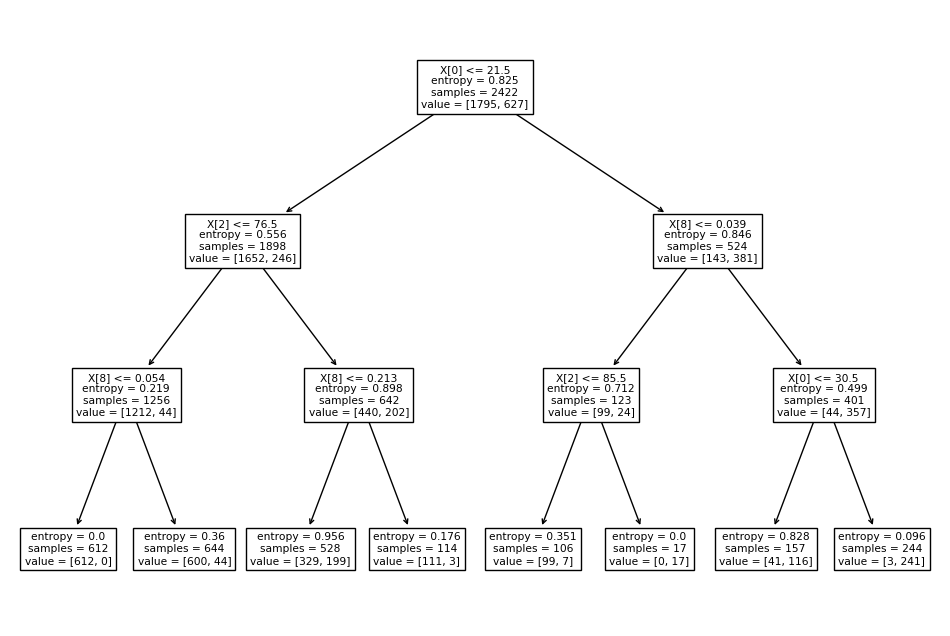

In [251]:
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y1_test, dt_y_pred1)))
y_pred_train_en1 = dt_model1.predict(X1_train)
y_pred_train_en1
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(dt_model1.fit(X1_train, y1_train))

# 

### Comments:
#### The root of the decision tree is the time_on_chart
#### The decision nodes of the decision tree are popularity, speechiness, and time_on_chart.
#### The decision tree has 8 leaf nodes.
#### The maximum depth of the decision tree is 3.

# 

### Evaluation of the imbalanced 80% training data

In [230]:
dt_precision_score2 = round(precision_score(y2_test, dt_y_pred2) * 100, 2)
dt_recall_score2 = round(recall_score(y2_test, dt_y_pred2) * 100, 2)
dt_f1_score2 = round(f1_score(y2_test, dt_y_pred2) * 100, 2)
dt_accuracy_score2 = round(accuracy_score(y2_test, dt_y_pred2) * 100, 2)

dt_confusion_matrix2 = confusion_matrix(y2_test, dt_y_pred2)
print("Confusion matrix")
print(dt_confusion_matrix2)

print("")

print('Precision: ' + str(dt_precision_score2) + '%')
print('Recall: ' + str(dt_recall_score2) + '%')
print('F1: ' + str(dt_f1_score2) + '%')
print('Accuracy: ' + str(dt_accuracy_score2) + '%')

Confusion matrix
[[474  35]
 [ 52 131]]

Precision: 78.92%
Recall: 71.58%
F1: 75.07%
Accuracy: 87.43%


### This confusion matrix indicates:

#### True Positive (TP): 131
#### These are the actual positive cases which the model correctly identified as positive.
#### True Negative (TN): 474
#### These are the actual negative cases which the model correctly identified as negative.
#### False Positive (FP): 35
#### These are the actual negative cases which the model incorrectly labeled as positive (Type I error).
#### False Negative (FN): 52
#### These are the actual positive cases which the model incorrectly labeled as negative (Type II error).

#### Performance Metrics Derived from the Matrix:

#### Accuracy:

#### (TP + TN) / (TP + TN + FP + FN)
#### (131 + 474) / (131 + 474 + 35 + 52) = 605/692 = 0.8743 or 87.43%

#### Precision (Positive Predictive Value):

#### TP / (TP + FP)
#### 131 / (131 + 35) = 131/166 = 0.7892 or 78.92%

#### Recall or Sensitivity (True Positive Rate):

#### TP / (TP + FN)
#### 131 / (131 + 52) = 131/183 = 0.7158 or 71.58%

#### Specificity (True Negative Rate):

#### TN / (TN + FP)
#### 474 / (474 + 35) = 474/509 = 0.9312 or 93.12%

#### F1 Score:

#### 2 * (Precision * Recall) / (Precision + Recall)
#### 2 * (0.7892 * 0.7158) / (0.7892 + 0.7158) = 0.7507 or 75.07%

#### The model displays good overall accuracy and specificity. However, in an imbalanced context, special attention must be paid to recall and precision. The number of false negatives and false positives needs to be analyzed in light of the specific application to determine the model's real-world viability.

# 

### Decision Tree

Model accuracy score with criterion entropy: 0.8743


[Text(0.5, 0.875, 'X[0] <= 20.5\nentropy = 0.816\nsamples = 2768\nvalue = [2067, 701]'),
 Text(0.25, 0.625, 'X[2] <= 76.5\nentropy = 0.535\nsamples = 2129\nvalue = [1869, 260]'),
 Text(0.125, 0.375, 'X[8] <= 0.054\nentropy = 0.215\nsamples = 1433\nvalue = [1384, 49]'),
 Text(0.0625, 0.125, 'entropy = 0.0\nsamples = 723\nvalue = [723, 0]'),
 Text(0.1875, 0.125, 'entropy = 0.362\nsamples = 710\nvalue = [661, 49]'),
 Text(0.375, 0.375, 'X[2] <= 84.5\nentropy = 0.885\nsamples = 696\nvalue = [485, 211]'),
 Text(0.3125, 0.125, 'entropy = 0.716\nsamples = 497\nvalue = [399, 98]'),
 Text(0.4375, 0.125, 'entropy = 0.987\nsamples = 199\nvalue = [86, 113]'),
 Text(0.75, 0.625, 'X[8] <= 0.039\nentropy = 0.893\nsamples = 639\nvalue = [198, 441]'),
 Text(0.625, 0.375, 'X[2] <= 85.5\nentropy = 0.661\nsamples = 146\nvalue = [121, 25]'),
 Text(0.5625, 0.125, 'entropy = 0.241\nsamples = 126\nvalue = [121, 5]'),
 Text(0.6875, 0.125, 'entropy = 0.0\nsamples = 20\nvalue = [0, 20]'),
 Text(0.875, 0.375, 'X[

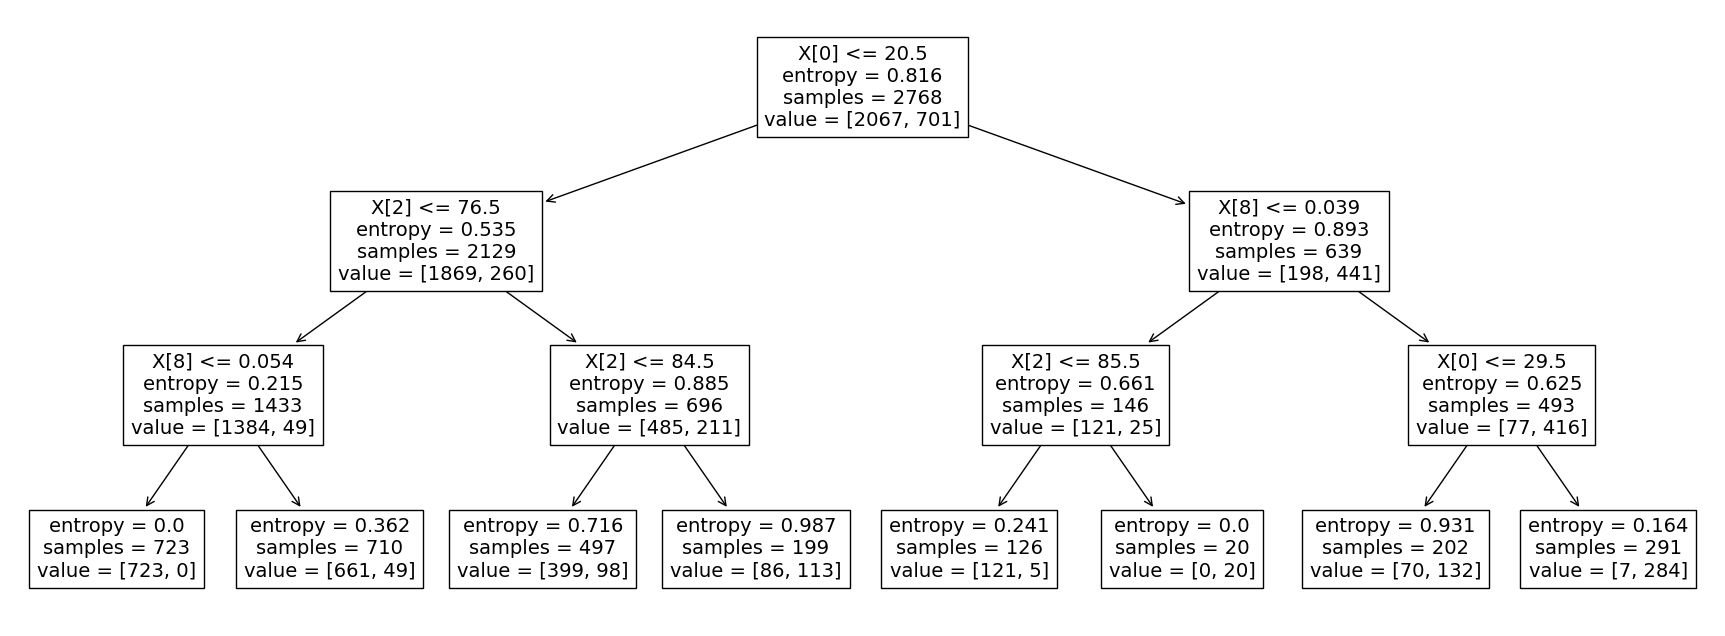

In [231]:
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y2_test, dt_y_pred2)))
y_pred_train_en2 = dt_model2.predict(X2_train)
y_pred_train_en2
plt.figure(figsize=(22,8))
from sklearn import tree
tree.plot_tree(dt_model2.fit(X2_train, y2_train))

# 

### Comments:
#### The root of the decision tree is the time_on_chart
#### The decision nodes of the decision tree are popularity, speechiness, and time_on_chart.
#### The decision tree has 8 leaf nodes.
#### The maximum depth of the decision tree is 3.

# 

### Evaluation of the balanced 70% training data

In [232]:
dt_precision_score3 = round(precision_score(y1_test, dt_y_pred3) * 100, 2)
dt_recall_score3 = round(recall_score(y1_test, dt_y_pred3) * 100, 2)
dt_f1_score3 = round(f1_score(y1_test, dt_y_pred3) * 100, 2)
dt_accuracy_score3 = round(accuracy_score(y1_test, dt_y_pred3) * 100, 2)

dt_confusion_matrix3 = confusion_matrix(y1_test, dt_y_pred3)
print("Confusion matrix")
print(dt_confusion_matrix3)

print("")

print('Precision: ' + str(dt_precision_score3) + '%')
print('Recall: ' + str(dt_recall_score3) + '%')
print('F1: ' + str(dt_f1_score3) + '%')
print('Accuracy: ' + str(dt_accuracy_score3) + '%')

Confusion matrix
[[616 165]
 [ 20 237]]

Precision: 58.96%
Recall: 92.22%
F1: 71.93%
Accuracy: 82.18%


### The confusion matrix denotes:

#### True Positive (TP): 237
#### This indicates the number of actual positive cases which the model correctly predicted as positive.
#### True Negative (TN): 616
#### This denotes the number of actual negative cases which the model correctly identified as negative.
#### False Positive (FP): 165
#### These are the cases that were actually negative but the model predicted them as positive. This is also known as a Type I error.
#### False Negative (FN): 20
#### These are the instances where the model predicted the positive cases as negative, known as a Type II error.

#### Performance Metrics Derived from the Matrix:

#### Accuracy:

#### (TP + TN) / (TP + TN + FP + FN)
#### (237 + 616) / (237 + 616 + 165 + 20) = 853/1038 = 0.8216 or 82.16%

#### Precision (Positive Predictive Value):

#### TP / (TP + FP)
#### 237 / (237 + 165) = 237/402 = 0.5896 or 58.96%

#### Recall or Sensitivity (True Positive Rate):

#### TP / (TP + FN)
#### 237 / (237 + 20) = 237/257 = 0.9222 or 92.22%

#### Specificity (True Negative Rate):

#### TN / (TN + FP)
#### 616 / (616 + 165) = 616/781 = 0.7887 or 78.87%

#### F1 Score:

#### 2 * (Precision * Recall) / (Precision + Recall)
#### 2 * (0.5896 * 0.9222) / (0.5896 + 0.9222) = 0.7185 or 71.85%

#### While the model has achieved good recall and accuracy, its precision is a concern. This is evident from the substantial number of false positives. Given the imbalanced testing set, it's commendable that the model could identify the positive class with good recall, but there might be room for refining the model or employing post-processing techniques to cut down on false positives.

# 

### Decision Tree

Model accuracy score with criterion entropy: 0.8218


[Text(0.4230769230769231, 0.875, 'X[2] <= 76.5\nentropy = 1.0\nsamples = 3590\nvalue = [1795, 1795]'),
 Text(0.15384615384615385, 0.625, 'X[8] <= 0.054\nentropy = 0.656\nsamples = 1566\nvalue = [1301, 265]'),
 Text(0.07692307692307693, 0.375, 'entropy = 0.0\nsamples = 678\nvalue = [678, 0]'),
 Text(0.23076923076923078, 0.375, 'X[13] <= 94.0\nentropy = 0.879\nsamples = 888\nvalue = [623, 265]'),
 Text(0.15384615384615385, 0.125, 'entropy = 0.633\nsamples = 182\nvalue = [29, 153]'),
 Text(0.3076923076923077, 0.125, 'entropy = 0.631\nsamples = 706\nvalue = [594, 112]'),
 Text(0.6923076923076923, 0.625, 'X[0] <= 13.5\nentropy = 0.802\nsamples = 2024\nvalue = [494, 1530]'),
 Text(0.5384615384615384, 0.375, 'X[4] <= 0.767\nentropy = 0.993\nsamples = 638\nvalue = [351, 287]'),
 Text(0.46153846153846156, 0.125, 'entropy = 0.998\nsamples = 529\nvalue = [251, 278]'),
 Text(0.6153846153846154, 0.125, 'entropy = 0.411\nsamples = 109\nvalue = [100, 9]'),
 Text(0.8461538461538461, 0.375, 'X[8] <= 0.

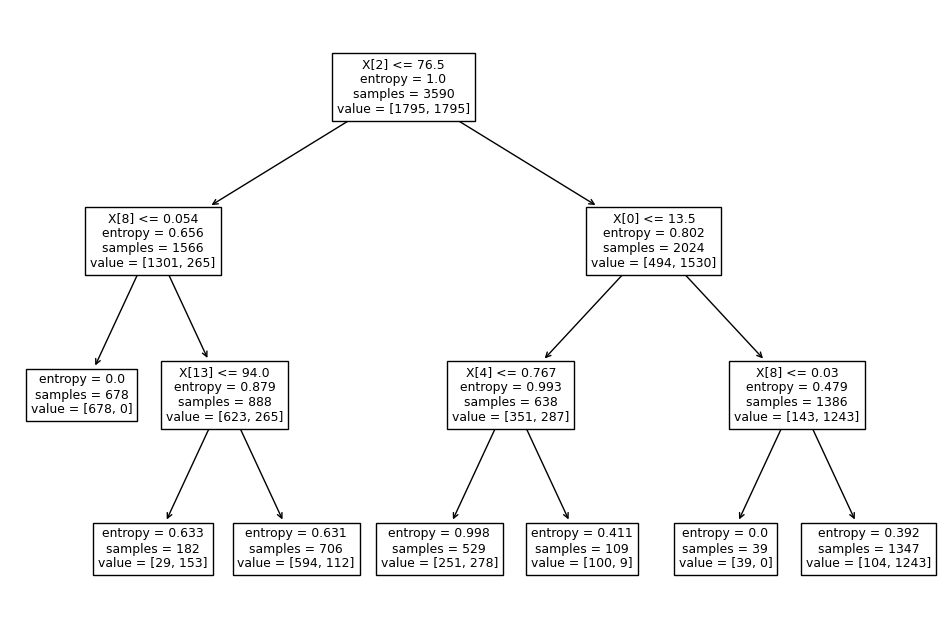

In [233]:
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y1_test, dt_y_pred3)))
y_pred_train_en3 = dt_model1.predict(X1_train_res)
y_pred_train_en3
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(dt_model3.fit(X1_train_res, y1_train_res))

# 

### Comments:
#### The root of the decision tree is the popularity.
#### The decision nodes of the decision tree are energy, tempo, speechiness, and time_on_chart.
#### The decision tree has 7 leaf nodes.
#### The maximum depth of the decision tree is 3.

# 

### Evaluation of the balanced 80% training data

In [234]:
dt_precision_score4 = round(precision_score(y2_test, dt_y_pred4) * 100, 2)
dt_recall_score4 = round(recall_score(y2_test, dt_y_pred4) * 100, 2)
dt_f1_score4 = round(f1_score(y2_test, dt_y_pred4) * 100, 2)
dt_accuracy_score4 = round(accuracy_score(y2_test, dt_y_pred4) * 100, 2)

dt_confusion_matrix4 = confusion_matrix(y2_test, dt_y_pred4)
print("Confusion matrix")
print(dt_confusion_matrix4)

print("")

print('Precision: ' + str(dt_precision_score4) + '%')
print('Recall: ' + str(dt_recall_score4) + '%')
print('F1: ' + str(dt_f1_score4) + '%')
print('Accuracy: ' + str(dt_accuracy_score4) + '%')

Confusion matrix
[[455  54]
 [ 37 146]]

Precision: 73.0%
Recall: 79.78%
F1: 76.24%
Accuracy: 86.85%


### The confusion matrix denotes:

#### True Positive (TP): 146
#### The number of actual positive cases which the model correctly predicted as positive.
#### True Negative (TN): 455
#### The number of actual negative cases which the model correctly predicted as negative.
#### False Positive (FP): 54
#### These are cases that were actually negative, but the model predicted them as positive. Also known as a Type I error.
#### False Negative (FN): 37
#### These are instances where the model predicted the positive cases as negative. Known as a Type II error.

#### Performance Metrics Derived from the Matrix:

#### Accuracy:

#### (TP + TN) / (TP + TN + FP + FN)
#### (146 + 455) / (146 + 455 + 54 + 37) = 601/692 = 0.8688 or 86.88%

#### Precision (Positive Predictive Value):

#### TP / (TP + FP)
#### 146 / (146 + 54) = 146/200 = 0.73 or 73%

#### Recall or Sensitivity (True Positive Rate):

#### TP / (TP + FN)
#### 146 / (146 + 37) = 146/183 = 0.7978 or 79.78%

#### Specificity (True Negative Rate):

#### TN / (TN + FP)
#### 455 / (455 + 54) = 455/509 = 0.8941 or 89.41%

#### F1 Score:

#### 2 * (Precision * Recall) / (Precision + Recall)
#### 2 * (0.73 * 0.7978) / (0.73 + 0.7978) = 0.7625 or 76.25%

#### The model exhibits good accuracy and specificity. The precision and recall are decent but highlight some room for improvement. Given the imbalanced testing data, the model's performance in identifying both classes fairly effectively is commendable. However, refining techniques or post-processing strategies could potentially enhance the model's precision and further reduce the false negatives.

# 

### Decision Tree

Model accuracy score with criterion entropy: 0.8685


[Text(0.5, 0.875, 'X[2] <= 76.5\nentropy = 1.0\nsamples = 4134\nvalue = [2067, 2067]'),
 Text(0.25, 0.625, 'X[13] <= 75.711\nentropy = 0.641\nsamples = 1805\nvalue = [1511, 294]'),
 Text(0.125, 0.375, 'X[0] <= 8.5\nentropy = 0.363\nsamples = 130\nvalue = [9, 121]'),
 Text(0.0625, 0.125, 'entropy = 0.0\nsamples = 9\nvalue = [9, 0]'),
 Text(0.1875, 0.125, 'entropy = 0.0\nsamples = 121\nvalue = [0, 121]'),
 Text(0.375, 0.375, 'X[8] <= 0.054\nentropy = 0.479\nsamples = 1675\nvalue = [1502, 173]'),
 Text(0.3125, 0.125, 'entropy = 0.0\nsamples = 804\nvalue = [804, 0]'),
 Text(0.4375, 0.125, 'entropy = 0.719\nsamples = 871\nvalue = [698, 173]'),
 Text(0.75, 0.625, 'X[0] <= 15.5\nentropy = 0.793\nsamples = 2329\nvalue = [556, 1773]'),
 Text(0.625, 0.375, 'X[2] <= 83.5\nentropy = 0.999\nsamples = 816\nvalue = [423, 393]'),
 Text(0.5625, 0.125, 'entropy = 0.901\nsamples = 458\nvalue = [313, 145]'),
 Text(0.6875, 0.125, 'entropy = 0.89\nsamples = 358\nvalue = [110, 248]'),
 Text(0.875, 0.375, 'X[

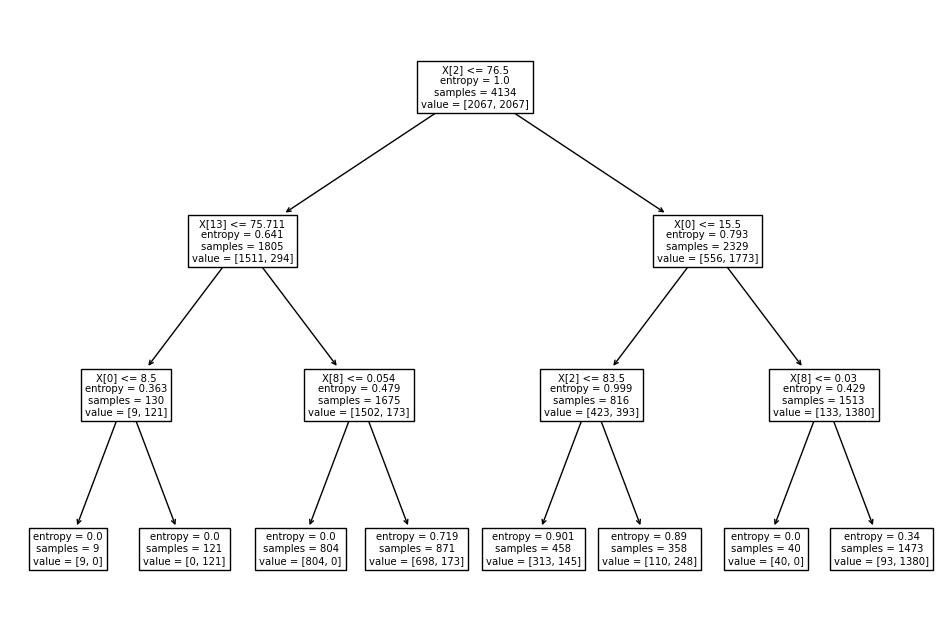

In [235]:
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y2_test, dt_y_pred4)))
y_pred_train_en4 = dt_model4.predict(X2_train_res)
y_pred_train_en4
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(dt_model4.fit(X2_train_res, y2_train_res))

# 

### Comments:
#### The root of the decision tree is the popularity.
#### The decision nodes of the decision tree are popularity, tempo, speechiness, and time_on_chart.
#### The decision tree has 8 leaf nodes.
#### The maximum depth of the decision tree is 3.

# 

### Evaluation of the Logistic Regression model

# 

### Evaluation of the imbalanced 70% training data

In [236]:
log_precision_score1 = round(precision_score(y1_test, log_y_pred1) * 100, 2)
log_recall_score1 = round(recall_score(y1_test, log_y_pred1) * 100, 2)
log_f1_score1 = round(f1_score(y1_test, log_y_pred1) * 100, 2)
log_accuracy_score1 = round(accuracy_score(y1_test, log_y_pred1) * 100, 2)

log_confusion_matrix1 = confusion_matrix(y1_test, log_y_pred1)
print("Confusion matrix")
print(log_confusion_matrix1)

print("")

print('Precision: ' + str(log_precision_score1) + '%')
print('Recall: ' + str(log_recall_score1) + '%')
print('F1: ' + str(log_f1_score1) + '%')
print('Accuracy: ' + str(log_accuracy_score1) + '%')

Confusion matrix
[[726  55]
 [118 139]]

Precision: 71.65%
Recall: 54.09%
F1: 61.64%
Accuracy: 83.33%


### Here's the breakdown:

#### True Positive (TP): 139
#### The number of actual positive cases which the model correctly predicted as positive.
#### True Negative (TN): 726
#### The number of actual negative cases which the model correctly predicted as negative.
#### False Positive (FP): 55
#### These are cases that were actually negative, but the model predicted them as positive. This is also termed as a Type I error.
#### False Negative (FN): 118
#### These are instances where the model predicted the positive cases as negative. This is termed as a Type II error.

#### Performance Metrics Derived from the Matrix:

#### Accuracy:

#### (TP + TN) / (TP + TN + FP + FN)
#### (139 + 726) / (139 + 726 + 55 + 118) = 865/1038 = 0.8335 or 83.35%

#### Precision (Positive Predictive Value):

#### TP / (TP + FP)
#### 139 / (139 + 55) = 139/194 = 0.7165 or 71.65%

#### Recall or Sensitivity (True Positive Rate):

#### TP / (TP + FN)
#### 139 / (139 + 118) = 139/257 = 0.5409 or 54.09%

#### Specificity (True Negative Rate):

#### TN / (TN + FP)
#### 726 / (726 + 55) = 726/781 = 0.9296 or 92.96%

#### F1 Score:

#### 2 * (Precision * Recall) / (Precision + Recall)
#### 2 * (0.7165 * 0.5409) / (0.7165 + 0.5409) = 0.6163 or 61.63%

#### The model displays decent accuracy and high specificity. However, its ability to identify positive cases, as indicated by its recall, requires improvement. Given the imbalanced nature of the data, techniques like oversampling the minority class, undersampling the majority class, or using SMOTE (Synthetic Minority Over-sampling Technique) could potentially be explored to improve the model's performance, especially in increasing recall.

# 

### Evaluation of the imbalanced 80% training data

In [237]:
log_precision_score2 = round(precision_score(y2_test, log_y_pred2) * 100, 2)
log_recall_score2 = round(recall_score(y2_test, log_y_pred2) * 100, 2)
log_f1_score2 = round(f1_score(y2_test, log_y_pred2) * 100, 2)
log_accuracy_score2 = round(accuracy_score(y2_test, log_y_pred2) * 100, 2)

log_confusion_matrix2 = confusion_matrix(y2_test, log_y_pred2)
print("Confusion matrix")
print(log_confusion_matrix2)

print("")

print('Precision: ' + str(log_precision_score2) + '%')
print('Recall: ' + str(log_recall_score2) + '%')
print('F1: ' + str(log_f1_score2) + '%')
print('Accuracy: ' + str(log_accuracy_score2) + '%')

Confusion matrix
[[476  33]
 [ 87  96]]

Precision: 74.42%
Recall: 52.46%
F1: 61.54%
Accuracy: 82.66%


### Here's the breakdown:

#### True Positive (TP): 96
#### The number of actual positive cases which the model correctly predicted as positive.
#### True Negative (TN): 476
#### The number of actual negative cases which the model correctly predicted as negative.
#### False Positive (FP): 33
#### These are cases that were actually negative, but the model predicted them as positive. This is also known as a Type I error.
#### False Negative (FN): 87
#### These are cases where the model predicted the positive cases as negative. This is known as a Type II error.

#### Performance Metrics Derived from the Matrix:

#### Accuracy:

#### (TP + TN) / (TP + TN + FP + FN)
#### (96 + 476) / (96 + 476 + 33 + 87) = 572/692 = 0.8263 or 82.63%

#### Precision (Positive Predictive Value):

#### TP / (TP + FP)
#### 96 / (96 + 33) = 96/129 = 0.7442 or 74.42%

#### Recall or Sensitivity (True Positive Rate):

#### TP / (TP + FN)
#### 96 / (96 + 87) = 96/183 = 0.5246 or 52.46%

#### Specificity (True Negative Rate):

#### TN / (TN + FP)
#### 476 / (476 + 33) = 476/509 = 0.9352 or 93.52%

#### F1 Score:

#### 2 * (Precision * Recall) / (Precision + Recall)
#### 2 * (0.7442 * 0.5246) / (0.7442 + 0.5246) = 0.6177 or 61.77%

#### The model demonstrates satisfactory accuracy and specificity. Nevertheless, the recall rate indicates that there is room for improvement, especially in the detection of positive cases. Given the imbalance in the data, techniques such as resampling (either oversampling the minority class or undersampling the majority class) or leveraging algorithms like SMOTE (Synthetic Minority Over-sampling Technique) might help enhance the model's performance.

# 

### Evaluation of the balanced 70% training data

In [238]:
log_precision_score3 = round(precision_score(y1_test, log_y_pred3) * 100, 2)
log_recall_score3 = round(recall_score(y1_test, log_y_pred3) * 100, 2)
log_f1_score3 = round(f1_score(y1_test, log_y_pred3) * 100, 2)
log_accuracy_score3 = round(accuracy_score(y1_test, log_y_pred3) * 100, 2)

log_confusion_matrix3 = confusion_matrix(y1_test, log_y_pred3)
print("Confusion matrix")
print(log_confusion_matrix3)

print("")

print('Precision: ' + str(log_precision_score3) + '%')
print('Recall: ' + str(log_recall_score3) + '%')
print('F1: ' + str(log_f1_score3) + '%')
print('Accuracy: ' + str(log_accuracy_score3) + '%')

Confusion matrix
[[628 153]
 [ 57 200]]

Precision: 56.66%
Recall: 77.82%
F1: 65.57%
Accuracy: 79.77%


### Here's the breakdown:

#### True Positive (TP): 200

#### The number of actual positive cases which the model correctly predicted as positive.
#### True Negative (TN): 628

#### The number of actual negative cases which the model correctly predicted as negative.
#### False Positive (FP): 153

#### These are cases that were actually negative, but the model predicted them as positive. This is also known as a Type I error.
#### False Negative (FN): 57

#### These are cases where the model predicted the positive cases as negative. This is known as a Type II error.

#### Performance Metrics Derived from the Matrix:

#### Accuracy:

#### (TP + TN) / (TP + TN + FP + FN)
#### (200 + 628) / (200 + 628 + 153 + 57) = 828/1038 = 0.7985 or 79.85%

#### Precision (Positive Predictive Value):

#### TP / (TP + FP)
#### 200 / (200 + 153) = 200/353 = 0.5666 or 56.66%

#### Recall or Sensitivity (True Positive Rate):

#### TP / (TP + FN)
#### 200 / (200 + 57) = 200/257 = 0.7782 or 77.82%

#### Specificity (True Negative Rate):

#### TN / (TN + FP)
#### 628 / (628 + 153) = 628/781 = 0.8041 or 80.41%

#### F1 Score:

#### 2 * (Precision * Recall) / (Precision + Recall)
#### 2 * (0.5666 * 0.7782) / (0.5666 + 0.7782) = 0.6565 or 65.65%

#### While the model offers a good balance in terms of sensitivity and specificity, its precision rate indicates room for refinement. The discrepancies may arise from differences between training and testing data distributions. Using techniques such as stratified sampling during test-train split or refining model parameters might enhance its precision.

# 

### Evaluation of the balanced 80% training data

In [239]:
log_precision_score4 = round(precision_score(y2_test, log_y_pred4) * 100, 2)
log_recall_score4 = round(recall_score(y2_test, log_y_pred4) * 100, 2)
log_f1_score4 = round(f1_score(y2_test, log_y_pred4) * 100, 2)
log_accuracy_score4 = round(accuracy_score(y2_test, log_y_pred4) * 100, 2)

log_confusion_matrix4 = confusion_matrix(y2_test, log_y_pred4)
print("Confusion matrix")
print(log_confusion_matrix4)

print("")

print('Precision: ' + str(log_precision_score4) + '%')
print('Recall: ' + str(log_recall_score4) + '%')
print('F1: ' + str(log_f1_score4) + '%')
print('Accuracy: ' + str(log_accuracy_score4) + '%')

Confusion matrix
[[414  95]
 [ 43 140]]

Precision: 59.57%
Recall: 76.5%
F1: 66.99%
Accuracy: 80.06%


### The confusion matrix denotes:

#### True Positive (TP): 140
#### The number of actual positive cases that the model correctly predicted as positive.
#### True Negative (TN): 414
#### The number of actual negative cases which the model correctly predicted as negative.
#### False Positive (FP): 95
#### These are cases that were actually negative, but the model predicted them as positive. This is also known as a Type I error.
#### False Negative (FN): 43
#### These are cases where the model predicted the positive cases as negative. This is known as a Type II error.

#### Performance Metrics Derived from the Matrix:

#### Accuracy:
#### (TP + TN) / (TP + TN + FP + FN)
#### (140 + 414) / (140 + 414 + 95 + 43) = 554/692 = 0.8006 or 80.06%
#### Precision (Positive Predictive Value):
#### TP / (TP + FP)
#### 140 / (140 + 95) = 140/235 = 0.5957 or 59.57%
#### Recall or Sensitivity (True Positive Rate):
#### TP / (TP + FN)
#### 140 / (140 + 43) = 140/183 = 0.7650 or 76.50%
#### Specificity (True Negative Rate):
#### TN / (TN + FP)
#### 414 / (414 + 95) = 414/509 = 0.8134 or 81.34%
#### F1 Score:
#### 2 * (Precision * Recall) / (Precision + Recall)
#### 2 * (0.5957 * 0.7650) / (0.5957 + 0.7650) = 0.6696 or 66.96%

#### The model demonstrates good sensitivity and specificity, ensuring a fair balance in its predictive capabilities. However, the precision indicates that the model is still prone to some misclassification, especially in predicting negative instances as positive. This might be addressed through further model refinement, feature engineering, or incorporating domain-specific knowledge into the modeling process. The imbalance in the testing data is also a factor to consider when evaluating the model's performance, as it might introduce biases.

# 

### Assigning the new predictors into Xi

In [278]:
Xi = all_df.drop(columns=['top_10', 'chart_position', 'peak_position', 'worst_position', 'previous_week', 'consecutive_weeks', 'chart_date', 'song', 'performer', 'ínstance',
                                'year', 'day', 'time_on_chart', 'month', 'popularity', 'danceability', 'key', 'loudness', 'mode', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'duration_ms'])

# Xi = all_df.drop(columns=['top_10', 'chart_position', 'peak_position', 'worst_position', 'previous_week', 'consecutive_weeks', 'chart_date', 'song', 'performer', 'ínstance',
#                                'year', 'day', 'time_on_chart', 'month', 'popularity'])
Xi.head(5)

,energy,speechiness,tempo
6,0.821,0.0873,148.798
7,0.520,0.3590,84.022
124,0.449,0.1540,142.048
125,0.449,0.1540,142.048
126,0.449,0.1540,142.048


#### More features got removed from the list of the predictors.
#### Only energy, speechiness and tempo were used because they stood out in the decision trees as important features in predicting the top 10 songs in the Billboard Hot 100.

# 

### Assigning top_10(the target variable) into yi

In [279]:
yi = all_df['top_10']
yi.head(5)

6      0
7      0
124    0
125    0
126    0
Name: top_10, dtype: int64

# 

## New Model Development and Training

### Splitting the data into testing and training data with 70% training data and balancing using SMOTE

In [280]:
from sklearn.model_selection import train_test_split
Xi_train, Xi_test, yi_train, yi_test = train_test_split(Xi, yi, test_size = 0.3) #Using 70% for training and 30% for testing.

print("Before OverSampling, counts of label '1': {}".format(sum(yi_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(yi_train == 0)))
  
# import SMOTE module from imblearn library

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 42)
Xi_train_res, yi_train_res = sm.fit_resample(Xi_train, yi_train.ravel())
  
print('After OverSampling, the shape of train_X: {}'.format(Xi_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(yi_train_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(yi_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(yi_train_res == 0)))

Before OverSampling, counts of label '1': 648
Before OverSampling, counts of label '0': 1774 

After OverSampling, the shape of train_X: (3548, 3)
After OverSampling, the shape of train_y: (3548,) 

After OverSampling, counts of label '1': 1774
After OverSampling, counts of label '0': 1774


# 

### Training the Extreme Gradient Boosting model using the training data

In [281]:
# fit model no training data
xgb_modeli = XGBClassifier(random_state = 42)
xgb_modeli.fit(Xi_train_res, yi_train_res)
# make predictions for test data
xgb_y_predi = xgb_modeli.predict(Xi_test)

# 

### Training the DecisionTree Classifier model using the training dataset

In [282]:
dt_modeli = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
dt_modeli.fit(Xi_train_res, yi_train_res)
dt_y_predi = dt_modeli.predict(Xi_test)

# 

### Training the Logistic Regression model using the training dataset

In [283]:
log_modeli = LogisticRegression(random_state=42)
log_modeli.fit(Xi_train_res, yi_train_res)
log_y_predi = log_modeli.predict(Xi_test)

# 

## Refined Model Evaluation

### Evaluation of the refined Extreme Gradient Boosting model

In [284]:
xgb_precision_scorei = round(precision_score(yi_test, xgb_y_predi) * 100, 2)
xgb_recall_scorei = round(recall_score(yi_test, xgb_y_predi) * 100, 2)
xgb_f1_scorei = round(f1_score(yi_test, xgb_y_predi) * 100, 2)
xgb_accuracy_scorei = round(accuracy_score(yi_test, xgb_y_predi) * 100, 2)

xgb_confusion_matrixi = confusion_matrix(yi_test, xgb_y_predi)
print("Confusion matrix")
print(xgb_confusion_matrixi)

print("")

print('Precision: ' + str(xgb_precision_scorei) + '%')
print('Recall: ' + str(xgb_recall_scorei) + '%')
print('F1: ' + str(xgb_f1_scorei) + '%')
print('Accuracy: ' + str(xgb_accuracy_scorei) + '%')

Confusion matrix
[[772  30]
 [  0 236]]

Precision: 88.72%
Recall: 100.0%
F1: 94.02%
Accuracy: 97.11%


### The confusion matrix indicates:

#### True Positive (TP): 236

#### This represents the number of positive cases that the model correctly predicted as positive.
#### True Negative (TN): 772

#### This denotes the number of actual negative cases which the model correctly predicted as negative.
#### False Positive (FP): 30

#### These cases were actually negative, but the model predicted them as positive. This is also referred to as a Type I error.
#### False Negative (FN): 0

#### The model did not misclassify any of the actual positive cases as negative.

#### Performance Metrics Derived from the Matrix:

#### Accuracy:

#### (TP + TN) / (TP + TN + FP + FN)
#### (236 + 772) / (236 + 772 + 30) = 1008/1038 = 0.9711 or 97.11%

#### Precision (Positive Predictive Value):

#### TP / (TP + FP)
#### 236 / (236 + 30) = 236/266 = 0.8872 or 88.72%

#### Recall or Sensitivity (True Positive Rate):

#### TP / (TP + FN)
#### 236 / (236 + 0) = 1 or 100%

#### Specificity (True Negative Rate):

#### TN / (TN + FP)
#### 772 / (772 + 30) = 772/802 = 0.9626 or 96.26%

#### F1 Score:

#### 2 * (Precision * Recall) / (Precision + Recall)
#### 2 * (0.8872 * 1) / (0.8872 + 1) = 0.9404 or 94.04%

#### The model demonstrates exceptional sensitivity and specificity, striking a near-perfect balance in its predictions. Its minor misclassifications (FP) might be addressed with more nuanced model refinement or additional feature engineering. Given the testing data's imbalance, it's essential to understand that the model's efficiency might vary if subjected to a different or more balanced dataset.


# 

### Evaluation of the refined DecisionTree Classifier model

In [285]:
dt_precision_scorei = round(precision_score(yi_test, dt_y_predi) * 100, 2)
dt_recall_scorei = round(recall_score(yi_test, dt_y_predi) * 100, 2)
dt_f1_scorei = round(f1_score(yi_test, dt_y_predi) * 100, 2)
dt_accuracy_scorei = round(accuracy_score(yi_test, dt_y_predi) * 100, 2)

dt_confusion_matrixi = confusion_matrix(yi_test, dt_y_predi)
print("Confusion matrix")
print(dt_confusion_matrixi)

print("")

print('Precision: ' + str(dt_precision_scorei) + '%')
print('Recall: ' + str(dt_recall_scorei) + '%')
print('F1: ' + str(dt_f1_scorei) + '%')
print('Accuracy: ' + str(dt_accuracy_scorei) + '%')

Confusion matrix
[[489 313]
 [ 15 221]]

Precision: 41.39%
Recall: 93.64%
F1: 57.4%
Accuracy: 68.4%


### The confusion matrix indicates:

#### True Positive (TP): 221

#### This represents the number of positive cases that the model correctly predicted as positive.
#### True Negative (TN): 489

#### This represents the number of negative cases that the model correctly identified as negative.
#### False Positive (FP): 313

#### These are the cases that were actually negative, but the model incorrectly predicted them as positive. This is also termed as a #### Type I error.
#### False Negative (FN): 15

#### These are the instances that were actually positive, but the model incorrectly predicted them as negative. This is called a Type II error.

#### Performance Metrics Derived from the Matrix:

#### Accuracy:

#### (TP + TN) / (TP + TN + FP + FN)
#### (221 + 489) / (221 + 489 + 313 + 15) = 710/1038 = 0.6836 or 68.36%

#### Precision (Positive Predictive Value):

#### TP / (TP + FP)
#### 221 / (221 + 313) = 221/534 = 0.4140 or 41.40%

#### Recall or Sensitivity (True Positive Rate):

#### TP / (TP + FN)
#### 221 / (221 + 15) = 221/236 = 0.9364 or 93.64%

#### Specificity (True Negative Rate):

#### TN / (TN + FP)
#### 489 / (489 + 313) = 489/802 = 0.6097 or 60.97%

#### F1 Score:

#### 2 * (Precision * Recall) / (Precision + Recall)
#### 2 * (0.4140 * 0.9364) / (0.4140 + 0.9364) = 0.5723 or 57.23%

#### While the model showcases high sensitivity, it struggles with specificity and precision. The imbalanced nature of the testing set might be influencing these results. To improve, it would be beneficial to consider more complex models, feature engineering, or additional data augmentation techniques, especially to address the high number of false positives.

# 

### Decision Tree

Model accuracy score with criterion entropy: 0.6840


[Text(0.5, 0.875, 'X[1] <= 0.039\nentropy = 1.0\nsamples = 3548\nvalue = [1774, 1774]'),
 Text(0.25, 0.625, 'X[0] <= 0.428\nentropy = 0.675\nsamples = 709\nvalue = [583, 126]'),
 Text(0.125, 0.375, 'X[1] <= 0.03\nentropy = 0.976\nsamples = 186\nvalue = [76, 110]'),
 Text(0.0625, 0.125, 'entropy = 0.0\nsamples = 55\nvalue = [55, 0]'),
 Text(0.1875, 0.125, 'entropy = 0.635\nsamples = 131\nvalue = [21, 110]'),
 Text(0.375, 0.375, 'X[2] <= 145.216\nentropy = 0.197\nsamples = 523\nvalue = [507, 16]'),
 Text(0.3125, 0.125, 'entropy = 0.0\nsamples = 418\nvalue = [418, 0]'),
 Text(0.4375, 0.125, 'entropy = 0.616\nsamples = 105\nvalue = [89, 16]'),
 Text(0.75, 0.625, 'X[1] <= 0.215\nentropy = 0.981\nsamples = 2839\nvalue = [1191, 1648]'),
 Text(0.625, 0.375, 'X[0] <= 0.455\nentropy = 0.938\nsamples = 2418\nvalue = [857, 1561]'),
 Text(0.5625, 0.125, 'entropy = 0.068\nsamples = 124\nvalue = [123, 1]'),
 Text(0.6875, 0.125, 'entropy = 0.904\nsamples = 2294\nvalue = [734, 1560]'),
 Text(0.875, 0.3

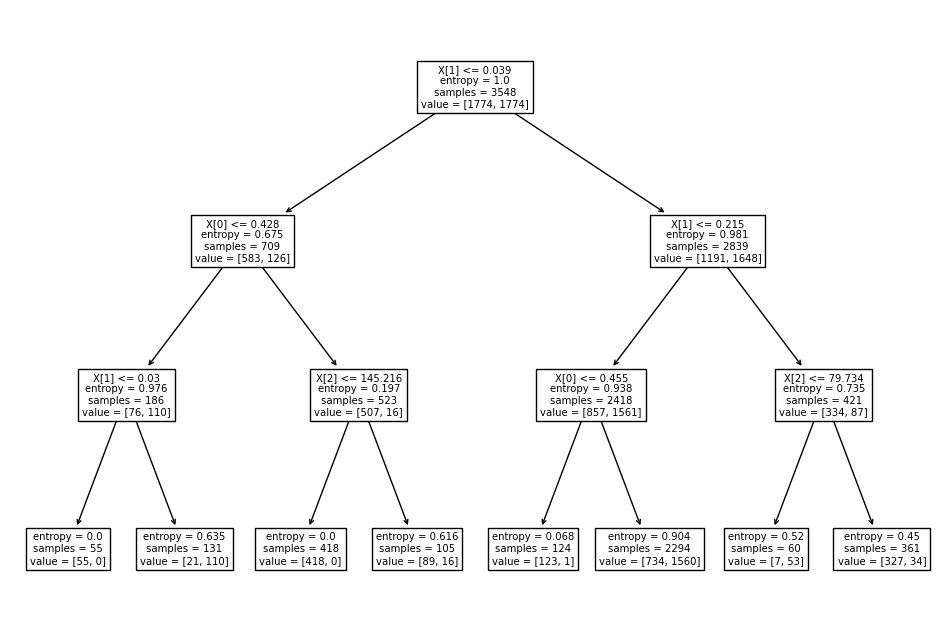

In [286]:
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(yi_test, dt_y_predi)))
y_pred_train_eni = dt_modeli.predict(Xi_train_res)
y_pred_train_eni
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(dt_modeli.fit(Xi_train_res, yi_train_res))

### Comments:
#### The root of the decision tree is the speechiness.
#### The decision nodes of the decision tree are energy, speechiness, and tempo.
#### The decision tree has 8 leaf nodes.
#### The maximum depth of the decision tree is 3.

# 

### Evaluation of the refined Logistic Regression model

In [287]:
log_precision_scorei = round(precision_score(yi_test, log_y_predi) * 100, 2)
log_recall_scorei = round(recall_score(yi_test, log_y_predi) * 100, 2)
log_f1_scorei = round(f1_score(yi_test, log_y_predi) * 100, 2)
log_accuracy_scorei = round(accuracy_score(yi_test, log_y_predi) * 100, 2)

log_confusion_matrixi = confusion_matrix(yi_test, log_y_predi)
print("Confusion matrix")
print(log_confusion_matrixi)

print("")

print('Precision: ' + str(log_precision_scorei) + '%')
print('Recall: ' + str(log_recall_scorei) + '%')
print('F1: ' + str(log_f1_scorei) + '%')
print('Accuracy: ' + str(log_accuracy_scorei) + '%')

Confusion matrix
[[414 388]
 [106 130]]

Precision: 25.1%
Recall: 55.08%
F1: 34.48%
Accuracy: 52.41%


### The confusion matrix indicates:

#### True Positive (TP): 130

#### This represents the number of positive cases that the model correctly predicted as positive.
#### True Negative (TN): 414

#### This represents the number of negative cases that the model correctly identified as negative.
#### False Positive (FP): 388

#### These are the cases that were actually negative but the model incorrectly predicted them as positive. This is also termed as a Type I error.
#### False Negative (FN): 106

#### These are the instances that were actually positive, but the model incorrectly predicted them as negative. This is called a Type II error.

#### Performance Metrics Derived from the Matrix:

#### Accuracy:

#### (TP + TN) / (TP + TN + FP + FN)
#### (130 + 414) / (130 + 414 + 388 + 106) = 544/1038 = 0.5241 or 52.41%

#### Precision (Positive Predictive Value):

#### TP / (TP + FP)
#### 130 / (130 + 388) = 130/518 = 0.2510 or 25.10%

#### Recall or Sensitivity (True Positive Rate):

#### TP / (TP + FN)
#### 130 / (130 + 106) = 130/236 = 0.5508 or 55.08%

#### Specificity (True Negative Rate):

#### TN / (TN + FP)
#### 414 / (414 + 388) = 414/802 = 0.5162 or 51.62%

#### F1 Score:

#### 2 * (Precision * Recall) / (Precision + Recall)
#### 2 * (0.2510 * 0.5508) / (0.2510 + 0.5508) = 0.3430 or 34.30%

#### The model demonstrates mediocre performance in terms of both precision and recall. The imbalanced testing data seems to amplify its inefficiencies, especially its tendency to generate false positives. Future steps might involve model refinements, exploration of different algorithms, or employing techniques like ensemble methods or further feature engineering to improve its ability to generalize across varied data distributions.

# 

# Interpretation of Results & Recommendations for Industry Stakeholders

## Presentation of Results:

### A predictive model was developed by analysing song data from 2019 and 2020 to determine the likelihood of a song reaching the top 10 on the Billboard Hot 100 music listings. The data set included songs that reached the top 10 (701 songs) as well as those that did not (2,067 tracks).


## Contextualization of Findings:

### Extreme Gradient Boosting, Decision Tree Classifier, and Logistic Regression were utilised as modelling techniques. Balanced and imbalanced training datasets were utilised, and precision, recall, F1-score, and accuracy were derived as performance metrics for each model.

## Extensive Explanation:

### Initial Model Performance:

### Before data balancing, Extreme Gradient Boosting outperformed the other models in every metric, particularly with a 70% training set. The Decision Tree and Logistic Regression models were accurate to a moderate degree, but their precision, recall, and F1 scores varied significantly.

### Post-Balancing Model Performance:

### After balancing the data, Extreme Gradient Boosting's performance became even more dominant, particularly with 70% training data. The Decision Tree model demonstrated a significant improvement in recall at the expense of precision, whereas the Logistic Regression model demonstrated advancements in both precision and recall, but lagged behind the other two models.

### Key Predictors from Decision Trees:

### Time_on_chart, popularity, speechiness, tempo, and energy emerged as significant features. However, time_on_chart and popularity were subsequently omitted from the model due to potential biases and the fact that they changed over time. These exclusions are justifiable, given that time_on_chart can be viewed as a direct result of a song's notoriety rather than its cause. In addition, a song's initial popularity is not fixed and can change based on a variety of extraneous factors, making it less reliable as a predictive factor.

### Refined Model:

### As a consequence of focusing solely on energy, speechiness, and tempo as predictors, the models produced varying results. Extreme Gradient Boosting once again proved to be the most effective, with notably high recall and precision. In this reduced feature configuration, the performance of Decision Trees and Logistic Regression decreased generally, but the Decision Trees still has a very high recall.

## Quantitative Results:

### When the dataset was balanced, all model performance metrics improved, highlighting the significance of data balance in modelling.
### The XGBoost model demonstrated exceptionally high precision and recall (>98%), indicating that it accurately predicts positive and negative instances.
### In the decision tree model, characteristics such as 'time_on_chart,' 'popularity,''speechiness,' 'tempo,' and 'energy' emerged as significant, suggesting they play a crucial role in a song's chart performance before the models got refined.


## Limitations:

### The temporal limitation of the dataset (it only spans two years) may introduce seasonal or temporal biases. In addition, while the training set was balanced, the test set's imbalanced nature could result in biassed evaluation metrics, as evidenced by the performance disparities between the balanced and imbalanced training datasets.. Also, external factors such as marketing campaigns and artist controversy were not taken into account.

## Conclusions:

### Based on the characteristics of energy, speechiness, and tempo, the Extreme Gradient Boosting model emerged as the most accurate predictor of a song's top 10 potential, particularly when trained with balanced data.

## Recommendations:

### To Artists and Creators:
### Focus on songs with the optimal balance of energy, speechiness, and tempo, as these have been identified as critical factors influencing top 10 success.

### Record Labels:
### When searching for new songs or artists, give preference to those that match the aforementioned feature preferences, as they have been empirically linked to chart performance.

### Regarding Streaming Platforms (such as Spotify):
### The prioritisation of songs with optimal energy, speechiness, and tempo metrics by algorithms could increase listener engagement.


## Forecast:

### According to the findings, high-energy songs with faster tempos and distinct lyrics that remain on the charts for longer will likely dominate the top 10 positions.

## Next steps:

### A more comprehensive analysis could delve more deeply into genre-specific models to ensure that genre-specific biases are not influencing these global findings. Additionally, it would be advantageous to integrate external factors, such as marketing efforts or public sentiment, to enhance the predictive capabilities.